In [6888]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime 
import warnings
warnings.filterwarnings('ignore')

In [6889]:
df = pd.read_csv('mechanical_fitting_failures_2011_2018-03.csv', parse_dates=True)
df.head()
print(df.shape)

(85611, 54)


In [6890]:
#Exploring Data Structure

print(df.shape)
#print(df.columns)
print(df.info())

(85611, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85611 entries, 0 to 85610
Data columns (total 54 columns):
DATAFILE_AS_OF                   85611 non-null object
FORM_REV                         85611 non-null object
OPERATOR_ID                      85611 non-null int64
REPORT_YEAR                      85611 non-null int64
REPORT_NUMBER                    85611 non-null int64
SUPPLEMENTAL_NUMBER              85611 non-null int64
REPORT_TYPE                      85611 non-null object
REPORT_DATE                      85611 non-null object
FILING_DATE                      85611 non-null object
OPERATOR_NAME                    85611 non-null object
HQ_ADDRESS_STREET                85611 non-null object
HQ_ADDRESS_CITY                  85611 non-null object
HQ_ADDRESS_COUNTY                6266 non-null object
HQ_ADDRESS_STATE                 85611 non-null object
HQ_ADDRESS_ZIP                   85611 non-null object
FAILURE_STATE                    85611 non-null object
FAIL

In [6891]:
#Convert date objects in to datetime: 
def convert_todate(dataframe, col):
    '''Converts date objects in to datetime format'''
    
    return pd.to_datetime(dataframe[col])   

In [6892]:
df['DATAFILE_AS_OF'] = convert_todate(df,'DATAFILE_AS_OF')

In [6893]:
df['REPORT_YEAR']    = convert_todate(df,'REPORT_YEAR')

In [6894]:
df['REPORT_DATE']    = convert_todate(df,'REPORT_DATE')

In [6895]:
df['FILING_DATE']    = convert_todate(df,'FILING_DATE')

In [6896]:
df['FAILURE_DATE']   = convert_todate(df,'FAILURE_DATE')

In [6897]:
#Result:
df[['DATAFILE_AS_OF', 'REPORT_YEAR', 'REPORT_DATE', 'FILING_DATE', 'FAILURE_DATE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85611 entries, 0 to 85610
Data columns (total 5 columns):
DATAFILE_AS_OF    85611 non-null datetime64[ns]
REPORT_YEAR       85611 non-null datetime64[ns]
REPORT_DATE       85611 non-null datetime64[ns]
FILING_DATE       85611 non-null datetime64[ns]
FAILURE_DATE      85611 non-null datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 3.3 MB


In [6898]:
#Unique keys in first and second pipe sizes

dict_key_1 =(df['FIRST_PIPE_NOMINAL_SIZE_TEXT'])
dict_key_1=list(set(dict_key_1))

dict_key_2 =(df['SECOND_PIPE_NOMINAL_SIZE_TEXT'])
dict_key_2=list(set(dict_key_2))

print((set(dict_key_1 + dict_key_2)))  

{'1/2?', '8? OR LARGER', nan, '2?', '6?', '4?', '1-1/4?', '1-3/4?', '1-1/2?', '3/4?', '3?', '1/4?', '1?'}


In [6899]:
def convert_tostr(dataframe, col):
    print(set(dataframe[col].astype(str)))
    return dataframe[col].astype(str)
    
def convert_tofl(string):
    """Convrets string to Float"""
    
    return string.map({'1-1/2?' : 1.5,
                       '1-1/4?' : 1.25,
                       '1-3/4?' : 1.75,
                       '1/2?' : 0.5,
                       '1/4?' : 0.25,
                       '1?' : 1,
                       '2?' : 2,
                       '3/4?' : 0.75,
                       '3?' : 3,
                       '4?' : 4,
                       '6?' : 6,
                       '8? OR LARGER' : 8,
                       'nan' : np.nan})

#Function Test:
#dict_1 = {'1-1/2?' : 1.5, '1-1/4?' : 1.25, '1-3/4?' : 1.75, '1/2?' : 0.5, '1/4?' : 0.25, '1?' : 1, '2?' : 2, '3/4?' : 0.75, '3?' : 3, '4?' : 4, '6?' : 6, '8? OR LARGER' : 8}
#fist_pipe_size=df_num_1.map(dict_1)



In [6900]:
df_pipe_1, df_pipe_2 =convert_tofl(convert_tostr(df,'FIRST_PIPE_NOMINAL_SIZE_TEXT')), convert_tofl(convert_tostr(df,'SECOND_PIPE_NOMINAL_SIZE_TEXT'))
print(df_pipe_1.head(), df_pipe_2.head())

{'1/2?', '8? OR LARGER', '2?', '4?', '1-1/4?', '1/4?', '1-3/4?', '1-1/2?', '3/4?', '3?', '6?', '1?'}
{'1/2?', '8? OR LARGER', 'nan', '2?', '4?', '1-1/4?', '1/4?', '1-3/4?', '1-1/2?', '3/4?', '3?', '6?', '1?'}
0    0.75
1    0.75
2    0.75
3    2.00
4    1.00
Name: FIRST_PIPE_NOMINAL_SIZE_TEXT, dtype: float64 0    0.75
1    0.50
2    0.75
3    2.00
4    1.00
Name: SECOND_PIPE_NOMINAL_SIZE_TEXT, dtype: float64


In [6901]:
df['FIRST_PIPE_NOMINAL_SIZE_TEXT'], df['SECOND_PIPE_NOMINAL_SIZE_TEXT']  = df_pipe_1, df_pipe_2  
print('Null Value in 1st Pipe After Conversion:', df['FIRST_PIPE_NOMINAL_SIZE_TEXT'].isnull().sum(), '\n''Null Value in 2nd Pipe After Conversion:', df['SECOND_PIPE_NOMINAL_SIZE_TEXT'].isnull().sum())

Null Value in 1st Pipe After Conversion: 0 
Null Value in 2nd Pipe After Conversion: 297


In [6902]:
df['SECOND_PIPE_NOMINAL_SIZE_TEXT'].median()

1.0

In [6903]:
def impute(dataframe, col):
    """Replace missing values with the median of column"""
    
    return dataframe[col].fillna(dataframe[col].median())

df['SECOND_PIPE_NOMINAL_SIZE_TEXT'] = impute(df,'SECOND_PIPE_NOMINAL_SIZE_TEXT')

In [6904]:
#Result: Impute
df['SECOND_PIPE_NOMINAL_SIZE_TEXT'].isnull().sum()

0

#### Which pipe size is most in demand?

FIRST_PIPE_NOMINAL_SIZE_TEXT:
 0.75    22030
1.00    19424
0.50    17410
2.00    14767
1.25     5912
Name: FIRST_PIPE_NOMINAL_SIZE_TEXT, dtype: int64 
SECOND_PIPE_NOMINAL_SIZE_TEXT:
 0.75    24596
1.00    20210
0.50    15721
2.00    13861
1.25     5630
Name: SECOND_PIPE_NOMINAL_SIZE_TEXT, dtype: int64


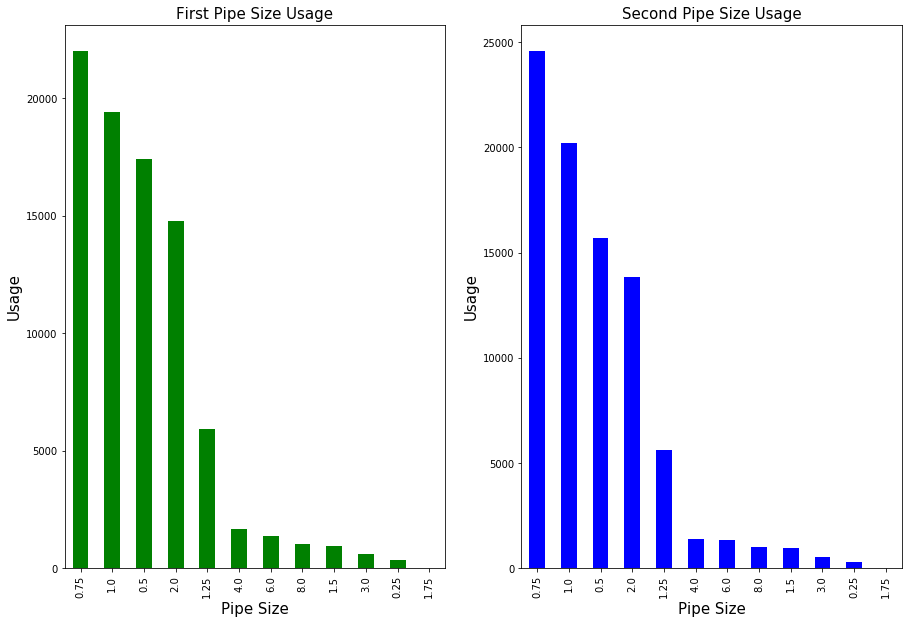

In [6912]:
first_pipe_size = df['FIRST_PIPE_NOMINAL_SIZE_TEXT'].value_counts()
second_pipe_size = df['SECOND_PIPE_NOMINAL_SIZE_TEXT'].value_counts()

print('FIRST_PIPE_NOMINAL_SIZE_TEXT:\n', first_pipe_size.head(),'\n' 'SECOND_PIPE_NOMINAL_SIZE_TEXT:\n', second_pipe_size.head())

plt.subplot(1,2,1)
first_pipe_size.plot.bar(figsize = (15,10), color = 'green')
_ = plt.xlabel('Pipe Size', fontsize = 15)
_ = plt.ylabel('Usage', fontsize = 15)
_ = plt.title('First Pipe Size Usage', fontsize = 15)
plt.subplot(1,2,2)
second_pipe_size.plot.bar(figsize = (15,10), color = 'blue')
_ = plt.xlabel('Pipe Size', fontsize = 15)
_ = plt.ylabel('Usage', fontsize = 15)
_ = plt.title('Second Pipe Size Usage', fontsize = 15)

#### Observation:
1. 0.75 was the most used pipe size by pipeline operators.

#### Question: Most stoted fitting in the lot?

In [6907]:
#Clean values in lot attributes:
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == 'UNVAVAILABLE'], 'UNAVAILABLE')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == 'UNKNOWN'], 'UNAVAILABLE')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == 'NONE'], 'UNAVAILABLE')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == 'UNK'], 'UNAVAILABLE')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == '1-1/4"""'], '1.25')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == '"2"""'], '2')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == '"3/4"""'], '0.75')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == '"1/2"""'], '0.5')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == 'UKN'], 'UNAVAILABLE')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == 'UNLNOWN'], 'UNAVAILABLE')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == '"1-1/4"""'], 'UNAVAILABLE')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == 'UNKNWON'], 'UNAVAILABLE')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == 'YNAVAILABLE'], 'UNAVAILABLE')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == 'POSILOCK'], 'POSI-LOCK')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == 'NOT APPLICABLE '], 'UNAVAILABLE')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == '"1 1/8"""'], '1.125')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == '"3"""'], '3')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == ' '], 'UNAVAILABLE')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == 'UNAVAILBLE'], 'UNAVAILABLE')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == 'UNAVAILAABLE'], 'UNAVAILABLE')
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'].replace(df['LOT_ATTRIBUTES'][df['LOT_ATTRIBUTES'] == 'NOT APPLICABLE'], 'UNAVAILABLE')

Most Stored parts in the Lot:
 PERMASERT                  174
CONNECTION NUT FOLLOWER    154
CONNECTION STAB            124
POSI-LOCK                  119
2                          100
Name: LOT_ATTRIBUTES, dtype: int64


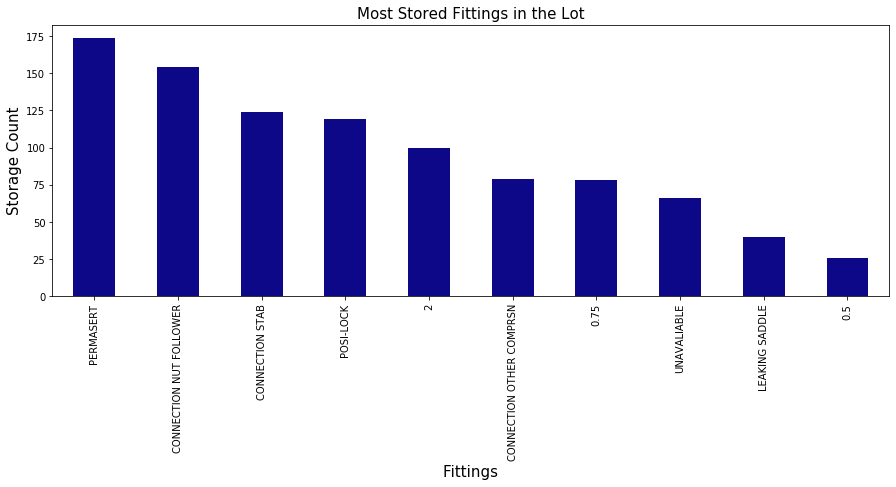

In [6908]:
#Most Stoted fittings in lot attributes:
df['LOT_ATTRIBUTES'] = df['LOT_ATTRIBUTES'][(df['LOT_ATTRIBUTES'].notnull()==True) & (df['LOT_ATTRIBUTES']!= 'UNAVAILABLE')]
lot_attributes = df['LOT_ATTRIBUTES'][(df['LOT_ATTRIBUTES'].notnull()==True) & (df['LOT_ATTRIBUTES']!= 'UNAVAILABLE')].value_counts()
print('Most Stored parts in the Lot:\n',lot_attributes.sort_values(ascending = False).head())
lot_attributes.sort_values(ascending = False).head(10).plot.bar(figsize = (15,5), cmap = 'plasma')
_ = plt.xlabel('Fittings', fontsize = 15)
_ = plt.ylabel('Storage Count', fontsize = 15 )
_ = plt.title('Most Stored Fittings in the Lot', fontsize = 15)

#### Observation:
Permasert is most stored fitting in the lot.

#### Questions: Most Stored Fitting by Manufacturere?

Most Stored Fittings by Manufacturer:
 MANUFACTURE                                                  LOT_ATTRIBUTES         
INNER-TITE                                                   POSI-LOCK                  119
PERFECTION                                                   PERMASERT                   93
DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES)  CONNECTION NUT FOLLOWER     72
UNKNOWN                                                      PERMASERT                   69
                                                             UNAVALIABLE                 61
Name: LOT_ATTRIBUTES, dtype: int64


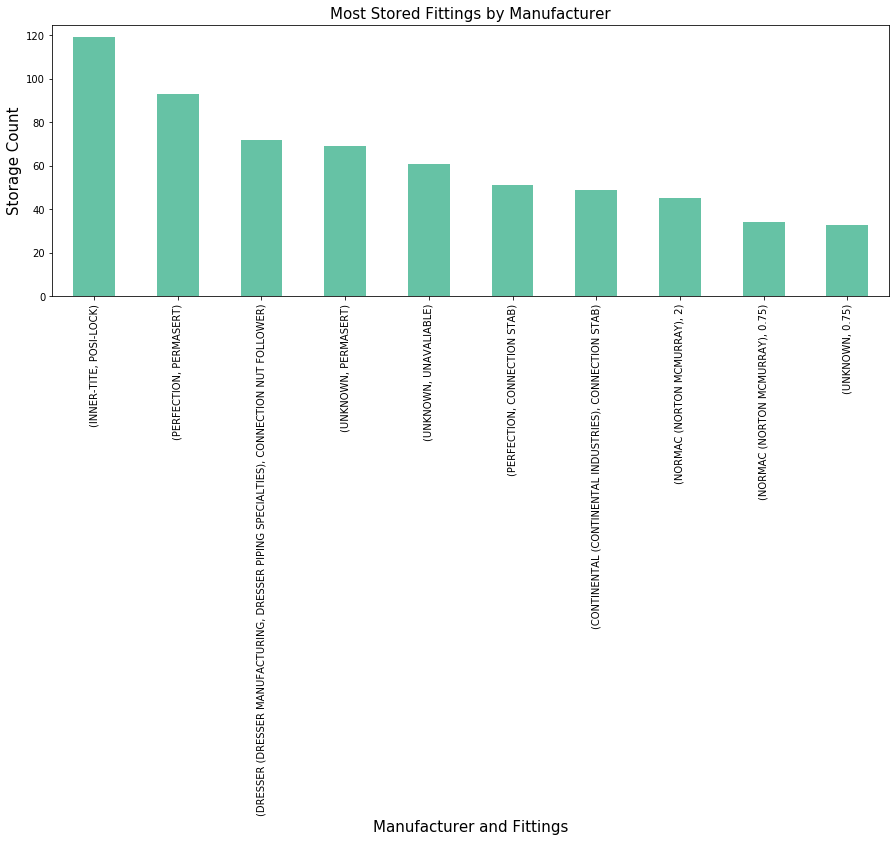

In [6961]:
#MOst Stored fittings by Manufacturer:
lot_mfg=df[['LOT_ATTRIBUTES', 'MANUFACTURE']][(df['LOT_ATTRIBUTES'].notnull()==True) & (df['LOT_ATTRIBUTES']!= 'UNAVAILABLE')]
print('Most Stored Fittings by Manufacturer:\n',lot_mfg.groupby(['MANUFACTURE', 'LOT_ATTRIBUTES'])['LOT_ATTRIBUTES'].count().sort_values(ascending = False).head())
lot_mfg.groupby(['MANUFACTURE', 'LOT_ATTRIBUTES'])['LOT_ATTRIBUTES'].count().sort_values(ascending = False).head(10).plot.bar(figsize = (15,5), cmap = 'Set2')
_ = plt.xlabel('Manufacturer and Fittings', fontsize = 15)
_ = plt.ylabel('Storage Count', fontsize = 15 )
_ = plt.title('Most Stored Fittings by Manufacturer', fontsize = 15)

#### Observation:
1. Inter-Tite had most stored Posi-Lock fittings stored in the lot.

#### Question: Are there multiple 'rev forms' for these fitings?

In [5209]:
#Any variance in column'FORM_REV'?: 
df['FORM_REV'].value_counts() #Only 1 unique value. Shows no variance. 

print('No Variance in FORM_REV')

No Variance in FORM_REV


#### Question: How many columns have missing values?

In [5210]:
#Number of columns with missing values:
plt.figure(figsize = (10,10))
df_null =pd.DataFrame(df.isnull().sum()/df.shape[0]).reset_index()
df_null.columns = ['col_name', 'null_yes']
df_null['null_yes']=round(df_null['null_yes'],2)
missing_columns=df_null['col_name'][df_null['null_yes']>0]
print('Number of Columns with Missing Values:', len(missing_columns))
missing_columns

Number of Columns with Missing Values: 22


12             HQ_ADDRESS_COUNTY
18             MF_INVOLVED_OTHER
20                 MF_TYPE_OTHER
24                YEAR_INSTALLED
25             YEAR_MANUFACTURED
26              DECADE_INSTALLED
29             MANUFACTURE_OTHER
30                  MODEL_NUMBER
31                    LOT_NUMBER
32                LOT_ATTRIBUTES
34        FITTING_MATERIAL_OTHER
38     FIRST_PIPE_MATERIAL_OTHER
39       FIRST_PIPE_PLASTIC_TEXT
40      FIRST_PIPE_PLASTIC_OTHER
44    SECOND_PIPE_MATERIAL_OTHER
45      SECOND_PIPE_PLASTIC_TEXT
46     SECOND_PIPE_PLASTIC_OTHER
48              LEAK_CAUSE_OTHER
49           NF_THERMAL_EXP_TEXT
50       EX_DAMAGE_OCCURRED_TEXT
51     MAT_WELDS_LEAK_CAUSE_TEXT
53      MFF_NUMBER_FROM_OPERATOR
Name: col_name, dtype: object

<Figure size 720x720 with 0 Axes>

Missing Values, Percentage:
 [(79345, 0.9268084708740699), (71434, 0.83440212122274), (82557, 0.9643270140519326), (23332, 0.2725350714277371), (27187, 0.31756433168634873), (77247, 0.9023022742404597), (82683, 0.9657987875389845), (594, 0.006938360724673231), (972, 0.011353681185828924), (75017, 0.8762542196680333), (84411, 0.9859831096471248), (82845, 0.9676910677366226), (58853, 0.6874467066148042), (85557, 0.9993692399341206), (85274, 0.9960635899592342), (58582, 0.6842812255434465), (85568, 0.9994977280956886), (79267, 0.9258973730011331), (72766, 0.8499608695144315), (83503, 0.9753769959467825), (73060, 0.8533950076508859), (11379, 0.1329151627711392)]


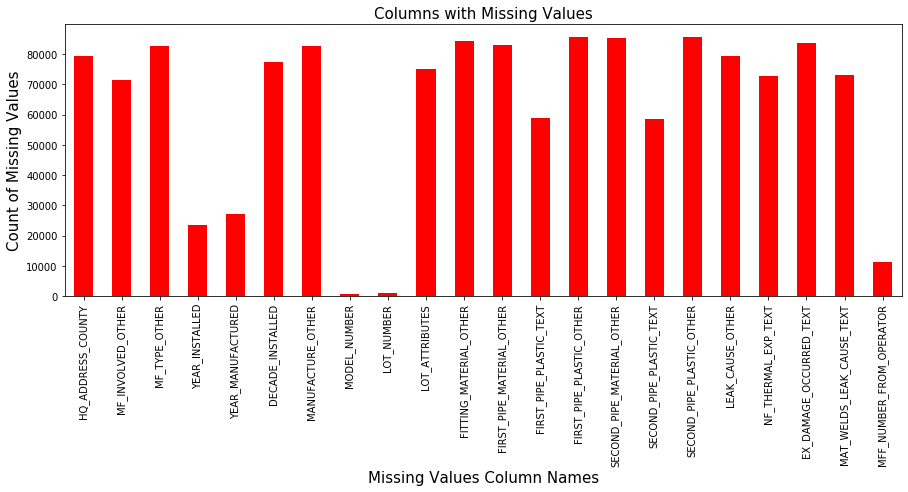

In [5211]:
#Plot of missing values: 
print('Missing Values, Percentage:''\n',list(zip(df[missing_columns].isnull().sum(),df[missing_columns].isnull().sum()/df.shape[0])))
df[missing_columns].isnull().sum().plot('bar', figsize = (15,5), color = 'red')
_=plt.xlabel('Missing Values Column Names', fontsize = 15)
_=plt.ylabel('Count of Missing Values', fontsize = 15)
_=plt.title('Columns with Missing Values', fontsize = 15)


#### Question: Can we write a function to develop a dashboard of missing values?
Example: 
1. How many columns have >=70% missing values? 
2. Does non-missing values contain unique values? 
3. Can these unique values be used to replace missing values in other columns which might be correlated or are similar?

In [5212]:
# Functions for Exploring Missing Values (Future Use:) 
"""
(****for later****)
class MissingValues():
    def __init__(self, dataframe, missing_col, missing_percentage):
        self.dataframe = dataframe
        self.missing_col = missing_col
        self.missing_percentage = missing_percentage
"""        
        
    
def missing_values(dataframe, missing_col, missing_percentage):
    """Identifies missing values in the dataframe"""
    
    missing=dataframe[missing_col].isnull().sum()[(dataframe[missing_col].isnull().sum()/dataframe.shape[0] > missing_percentage) == True]
    return round(missing,2)


def percentage_missing(dataframe, missing_col, missing_percentage):
    """Identifies Percentage of missing values in the dataframe"""
    
    percent_missing = (dataframe[missing_col].isnull().sum()/dataframe.shape[0])[((dataframe[missing_col].isnull().sum()/dataframe[missing_col].shape[0])>missing_percentage) == True]
    return round (percent_missing,2)



def unique_value_counts_missing_columns(dataframe, missing_col, missing_percentage):
    """Returns count of unique values in the missing column.
       Where missing column is equal to i=df_null.col_name[df_null.null_yes==True]
       as calculated earlier in line 16
       """
    
    return dataframe[missing_columns].nunique()[(dataframe[missing_col].isnull().sum()/dataframe.shape[0] > missing_percentage) == True]                      


def given_values_in_missing_columns(dataframe, missing_col, missing_percentage):
    """Returns count of given values in the missing column.
       Where missing column is equal to i=df_null.col_name[df_null.null_yes==True]
       as calculated earlier in line 16
       """
    
    return dataframe[missing_columns].count()[(dataframe[missing_col].isnull().sum()/dataframe.shape[0] > missing_percentage) == True]                      




def number_missing_columns(dataframe, missing_percentage):
    """ Returns number of columns with missing values as we change missing percentage"""
    
    if (missing_percentage > 1) | (missing_percentage < 0):
        return('Please enter percentage value between 0 & 1')
    
    else:
        return len(dataframe.isnull().sum()[(dataframe.isnull().sum()/dataframe.shape[0] > missing_percentage) == True])


def missing_avg(dataframe, missing_col, missing_percentage):
    """Calculates average of missing values in the missing columns"""
    
    total_missing_percentage = sum(dataframe[missing_col].isnull().sum()/dataframe[missing_col].shape[0])
    length_missing_columns = len(dataframe[missing_col].isnull().sum()) 
    return round((total_missing_percentage/length_missing_columns),2)
              

def missing_dashboard(dataframe, missing_col, missing_percentage):
    missing_table = pd.concat([missing_values(dataframe, missing_col, missing_percentage), percentage_missing(dataframe, missing_col, missing_percentage), unique_value_counts_missing_columns(dataframe, missing_col, missing_percentage), given_values_in_missing_columns(dataframe, missing_col, missing_percentage)], axis = 1)
    missing_table.columns = ['missing_values', 'missing_percentage', 'unique_values_in_missing_columns', 'available_values_in_missing column']
    print ('Average (base) Missing Percentage:',missing_avg(dataframe, missing_col, missing_percentage),'\n''Number of Missing Columns\n(Random with Missing Percentage):', number_missing_columns(dataframe, missing_percentage) )
    return missing_table 
    

In [5213]:
#Missing Value Dashboard:
missing_dashboard(dataframe = df, 
                  missing_col= missing_columns,
                  missing_percentage = 0.7)      

Average (base) Missing Percentage: 0.73 
Number of Missing Columns
(Random with Missing Percentage): 15


,missing_values,missing_percentage,unique_values_in_missing_columns,available_values_in_missing column
HQ_ADDRESS_COUNTY,79345,0.93,84,6266
MF_INVOLVED_OTHER,71434,0.83,741,14177
MF_TYPE_OTHER,82557,0.96,328,3054
DECADE_INSTALLED,77247,0.90,10,8364
MANUFACTURE_OTHER,82683,0.97,217,2928
LOT_ATTRIBUTES,75017,0.88,738,10594
FITTING_MATERIAL_OTHER,84411,0.99,58,1200
FIRST_PIPE_MATERIAL_OTHER,82845,0.97,45,2766
FIRST_PIPE_PLASTIC_OTHER,85557,1.00,31,54
SECOND_PIPE_MATERIAL_OTHER,85274,1.00,56,337


#### Observation: 
1. Fifteen columns have greater than 70% missing values.
2. These columns contain non-missing unique values.
3. Also, these columns have unique values shared with other columns ending with label _TEXT
4. Can we use these unique values to replace missing values in other columns. 

#### Question: What are the unique values in >=70% missing columns?

In [5214]:
#Exploring Unique Values in the Missing Columns:
for j,k in df[missing_columns].items():                     # j, k is the column name value in the missing columns 
    print("******",df[j].name,"*****" '\n', '\n', k.unique(), '\n')    

****** HQ_ADDRESS_COUNTY *****
 
 [nan 'US' 'BERKSHIRE' 'RICHARDSON' 'GREENWOOD' 'FAIRFIELD' 'GWINNETT'
 'MOBILE' 'BURLEIGH' 'DUPAGE' 'USA' 'ROANOKE' 'PAWNEE' 'HARDIN' 'SEVIER'
 'PULASKI' 'LEXINGTON' 'SAINT CLAIR' 'GREENE' 'TRUMBULL' 'JACKSON'
 'JOHNSON' 'PIMA' 'JEFFERSON' 'ARANSAS' 'FULTON' 'TULSA' 'COBB'
 'WORCESTER' 'MIDDLESEX' 'WASHINGTON' 'KINGS' 'SHELBY' 'BARTOW' 'KENT'
 'NUECES' 'CULLMAN' 'PITTSYLVANIA' 'NEW CASTLE' 'LAURENS' 'ESCAMBIA'
 'LAUDERDALE' 'ALACHUA' 'BERNALILLO' 'DALLAS' 'MADISON' 'ORANGE'
 'LAWRENCE' 'HENDERSON' 'MARSHALL' 'DOUGLAS' 'WAYNE' 'PLYMOUTH'
 'TREMPEALEAU' 'JASPER' 'KANAWHA' 'ERIE' 'OTOE' 'MONMOUTH' 'LICKING'
 'ONONDAGA' 'MULTNOMAH' 'WILLIAMS' 'SAN FRANCISCO' 'SANTA CLARA'
 'HILLSBOROUGH' 'DENVER' 'GASTON' 'NASH' 'ATLANTIC' 'CABELL' 'TRAVIS' 'TX'
 'DELAWARE' 'SAINT LOUIS CITY' 'UNION' 'TIPPAH' 'LUCAS' 'FORREST'
 'MILWAUKEE' 'HANCOCK' 'PENOBSCOT' 'RANCIN' 'COCONINO' 'TAZEWELL'] 

****** MF_INVOLVED_OTHER *****
 
 [nan 'CONTINENTAL' 'METFIT' 'COUPLING' 'CRIMP

#### Question: Which unique values in missing dashboard table as shown by column label ending with  __OTHER that can be used to fill missing values in the other similar columns ending with column labels __TEXT?

In [5215]:
#Explore two similar columns: 
#****Goal: Replace missing values in col_1 with non-missing values found in col_2 (if any)**** 

#Columns 1:
col_1 = ['MF_INVOLVED_TEXT','MF_TYPE_TEXT', 'MANUFACTURE', 'FITTING_MATERIAL_TEXT', 'FIRST_PIPE_MATERIAL_TEXT', 'FIRST_PIPE_PLASTIC_TEXT', 'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_PLASTIC_TEXT', 'LEAK_CAUSE_TEXT']
         
#Columns 2: 
col_2 = ['MF_INVOLVED_OTHER', 'MF_TYPE_OTHER','MANUFACTURE_OTHER', 'FITTING_MATERIAL_OTHER','FIRST_PIPE_MATERIAL_OTHER','FIRST_PIPE_PLASTIC_OTHER', 'SECOND_PIPE_MATERIAL_OTHER', 'SECOND_PIPE_PLASTIC_OTHER', 'LEAK_CAUSE_OTHER']

#Missing values in column 1 and Unique values in columns 2:
missing_col_1, unique_col_2 = df[col_1].isnull().sum(), df[col_2].nunique()

print("Missing Values in Column_1:"'\n', missing_col_1, '\n',"Unique Values in Column_2:"'\n', unique_col_2)

compare_similar = list(zip(col_1, col_2, missing_col_1, unique_col_2))

columns_to_compare = []
for i in compare_similar:
    if (i[2] & i[3]) != 0:         #checking for non-zero missing and unique values in col_1 & col_2
        columns_to_compare.append(i)

print('\n''Result:')        
print("Selected columns for missing value replacement:"'\n', columns_to_compare)


Missing Values in Column_1:
 MF_INVOLVED_TEXT                 0
MF_TYPE_TEXT                     0
MANUFACTURE                     53
FITTING_MATERIAL_TEXT            0
FIRST_PIPE_MATERIAL_TEXT         0
FIRST_PIPE_PLASTIC_TEXT      58853
SECOND_PIPE_MATERIAL_TEXT      295
SECOND_PIPE_PLASTIC_TEXT     58582
LEAK_CAUSE_TEXT                  0
dtype: int64 
 Unique Values in Column_2:
 MF_INVOLVED_OTHER             741
MF_TYPE_OTHER                 328
MANUFACTURE_OTHER             217
FITTING_MATERIAL_OTHER         58
FIRST_PIPE_MATERIAL_OTHER      45
FIRST_PIPE_PLASTIC_OTHER       31
SECOND_PIPE_MATERIAL_OTHER     56
SECOND_PIPE_PLASTIC_OTHER      24
LEAK_CAUSE_OTHER              822
dtype: int64

Result:
Selected columns for missing value replacement:
 [('MANUFACTURE', 'MANUFACTURE_OTHER', 53, 217), ('FIRST_PIPE_PLASTIC_TEXT', 'FIRST_PIPE_PLASTIC_OTHER', 58853, 31), ('SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_MATERIAL_OTHER', 295, 56), ('SECOND_PIPE_PLASTIC_TEXT', 'SECOND_PIPE_PLASTIC_

#### Question: Can we write a function that can identify missing value replacement from other similar columns? 
Goal is to replace missing values for modeling.

In [5216]:
def missing_value_replacement(dataframe,col_1, col_2, column_index = False):
    """This function will find index of missing value columns 
    and will return value counts of unique values that can be used 
    to replace missing values in other similar columns
    Please note similar columns can be identifed by looking at your data  
    or by calculating correlation between columns"""
    while column_index == False:
        col_index = dataframe[col_1][(dataframe[col_1].isnull())==True].index
        replacement = dataframe.loc[col_index][col_2].value_counts()
        return replacement
        break
    
    return "****This function cannot be used****"

In [5217]:
print(missing_value_replacement(df, 'MANUFACTURE', 'MANUFACTURE_OTHER', column_index = False))
print(missing_value_replacement(df, 'FIRST_PIPE_PLASTIC_TEXT', 'FIRST_PIPE_PLASTIC_OTHER', column_index = False))
print(missing_value_replacement(df, 'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_MATERIAL_OTHER', column_index = False))
print(missing_value_replacement(df, 'SECOND_PIPE_PLASTIC_TEXT', 'SECOND_PIPE_PLASTIC_OTHER', column_index = False))

print("\n""Result: No unique values identified for missing replacement in column lables ending with _TEXT")

Series([], Name: MANUFACTURE_OTHER, dtype: int64)
Series([], Name: FIRST_PIPE_PLASTIC_OTHER, dtype: int64)
Series([], Name: SECOND_PIPE_MATERIAL_OTHER, dtype: int64)
Series([], Name: SECOND_PIPE_PLASTIC_OTHER, dtype: int64)

Result: No unique values identified for missing replacement in column lables ending with _TEXT


#### Observtaion: 
1. Column lables stored in "unique_col_2" can be dropped from the dataframe.
2. Column lables stored in "missing_col_1" already contains all unique values from "unique_col_2"

Hence, columns in "unique_col_2" can be considered duplicate columns of "missing_col_1".

#### Question: Could there be values in columns where value is non-null but contains words such as others, not available etc and can be replaced by available unique values in the other similar column?

#### LEAK_CAUSE_TEXT Vs LEAK_CAUSE_OTHER

In [5218]:
#Explore columns LEAK_CAUSE_TEXT with LEAK_CAUSE_OTHER where LEAK_CAUSE_TEXT has no null values 
#but contains OTHER and OTHER OUTSIDE FORCE DAMAGE keywords 
#while LEAK_CAUSE_OTHER contains viable description for these values.

print("****first***",df['LEAK_CAUSE_TEXT'].value_counts(), "****second***",df['LEAK_CAUSE_OTHER'].value_counts())

****first*** EQUIPMENT                     39370
NATURAL FORCES                13230
MATERIAL OR WELDS/FUSIONS     12551
INCORRECT OPERATION            7070
OTHER                          6362
CORROSION                      4330
EXCAVATION DAMAGE              2123
OTHER OUTSIDE FORCE DAMAGE      575
Name: LEAK_CAUSE_TEXT, dtype: int64 ****second*** UNKNOWN                                                                                                                                                1067
NOT DETERMINED                                                                                                                                          736
NO MATERIAL                                                                                                                                             573
THREAD LEAK                                                                                                                                             212
MATERIAL NOT AVAILABLE FO

#### Filter Values in LEAK_CAUSE_TEXT we want to replace: 
1. OTHER: 6362 
2. OTHER OUTSIDE FORCE DAMAGE: 575

In [5219]:
def missing_value_index_from_column_1(dataframe, col_1, filter_1, filter_2):
    """Returns missing value index from the first column based on two defined filter values"""
    
    missing_value_index_column_1 = dataframe[col_1][(dataframe[col_1]==filter_1) | (dataframe[col_1]==filter_2)].index
    return missing_value_index_column_1

In [5220]:
#Explore missing value index in LEAK_CAUSE_TEXT after applying filter:
print(missing_value_index_from_column_1(df, 'LEAK_CAUSE_TEXT', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))

Int64Index([    0,     2,     3,     5,     7,     8,     9,    10,    11,
               13,
            ...
            85328, 85334, 85335, 85361, 85365, 85372, 85388, 85479, 85481,
            85555],
           dtype='int64', length=6937)


In [5221]:
def getvalues_from_column_2_using_missing_index_from_column_1(dataframe, col_1, col_2, filter_1, filter_2):
    """Returns replacement values with count in descending order from column 2 for column 1
    based on missing index values and two filters selected from column 1"""
    
    missing_value_index_column_1 = dataframe[col_1][(dataframe[col_1]==filter_1) | (dataframe[col_1]==filter_2)].index #Can also use missing_value_index_from_column_1 function here
    missing_value_replacement_from_column_2= dataframe.loc[missing_value_index_column_1][col_2].value_counts().sort_values(ascending = False)#.head(100)
    return missing_value_replacement_from_column_2

In [5222]:
replacement_values = getvalues_from_column_2_using_missing_index_from_column_1(df, 'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE')

In [5223]:
replacement_values
#not_required=top_20_clean.filter(like = "NO")[:-1]
#not_required

UNKNOWN                                                      1067
NOT DETERMINED                                                736
NO MATERIAL                                                   573
THREAD LEAK                                                   212
MATERIAL NOT AVAILABLE FOR INVESTIGATION                      199
UNKNOWN NO MATERIAL                                           137
NO MATERIAL AVAILABLE                                         135
NUT FOLLOWER                                                  133
MATL NOT AVAIL TO INVESTIGATE                                 130
IN SERVICE NOT INVESTIGATED                                   100
NUTS APPEAR TO LOOSEN OVERTIME                                 91
GASKET                                                         90
OTHER                                                          88
LEAK THROUGH SEAL                                              79
STILL IN SERVICE                                               69
BURRIED IN

In [5224]:
#missing_replacement_column_1=getvalues_from_column_2_using_missing_index_from_column_1(df, 'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE')
#df_missing_replacement_column_1 = pd.DataFrame(missing_replacement_column_1).reset_index()
#df_missing_replacement_column_1.columns = ['leak_description_col_2', 'leak_description_count']
#df_missing_replacement_column_1.head()
#not_required=(df_missing_replacement_column_1['leak_description_col_2']).str.find('UN', 0)
#not_required
#df_missing_replacement_column_1.loc[not_required]['leak_description_col_2']
                            

#### Observation: 

Top 100 replacement values show multiple duplicates that can replace OTHER or OTHER OUTSIDE FORCE DAMAGE described in LEAK_CAUSE_TEXT:

1. THREAD LEAK* (common)
2. NUT FOLLOWER*
3. NUTS APPEAR TO LOOSEN OVERTIME (common)              
4. GASKET * (common)                                                                              
5. LEAK THROUGH SEAL (common)                            
6. STILL IN SERVICE*                              
7. BURRIED IN SNOW*                               
8. NUTS LOOSENED*    (common)                             
9. SHRUNKEN GASKET*                               
10. GASKETS (common)                                       
11. MATERIAL DEFECT*
12. NOT PROVIDED BY REPAIR CREW*                  
13. ELASTOMER FAILURE*                            
14. LOOSE BOLTS*                                   
15. LOOSENED OVER TIME (common)                         
16. GASKET/O-RING   (common)                         
17. GASKET ORING    (common)                         
18. PULLED OUT*                                
19. TREE ROOTS*  (common)                             
20. LEAKED THROUGH SEAL (common)                     
21. GASKET/O-RINGS  (common)                          
22. MATERIAL EXCEEDED SERVICE LIFE  (common)             
23. LOOSE       (common)                                  
24. AGE*      (common)                             
25. TIGHTENED*                                 
26. LOOSE NUT  (common)                               
27. CONSTRUCTION/INSTALLATION DEFECT*   (common)         
28. DESIGN DEFECT*                              
29. EXCEEDED SERVICE LIFE  (common)                 
30. INSTALLATION ERROR (common)                        
31. SEALS   (common)                                      
32. GASKET O-RING* (common)                                 
33. O-RINGS     (common)                                  
34. LOOSE FITTING   (common)                             
35. GASKET/ORING  (common)                               
36. EXCESSIVE EARTH LOAD*                         
37. SEAL     (common)                                  
38. GROUND MOVEMENT*                          
39. O RING     (common)                                  
40. O-RING     (common)                                 
41. THREADS       (common)                           
42. SEAL LEAK*      (common)                           
43. GASKET ORINGS   (common)                         
44. GASKET-O-RINGS  (common)            
45. GASKET/O-RINGS  (common)
46. O RINGS (common)
47. GASKET O RING (common)
48. EXCEEDING SERVICE LIFE (common)
49. MATERIAL DETERIORATION (common) 
50. THIRD PARTY DAMAGE*
51. VEHICLE DAMAGE* 
52. IMPROPER INSTALL (common)
53. RUBBERS*
54. BACKFILL*                                                                                      
55. FITTING LOOSENED (common)
56. NUTS SEEM TO LOOSEN OVERTIME (common)
57. THIRD PARTY (common)
58. INCORRECT INSTALLATION - SCRATCHED TUBING 
59. TREE ROOT (common)
69. INSTALLATION DEFECT (common)
61. COMPRESSION COUPLING*
62. BELL JOINT*
63. PREVIOUS PIPE WALL DAMAGE*
64. ORING
65. LEAKING SEAL
66. COMPRESSION DRESSER COUPLING SLIGHTLY LOOSE. REMOVED AND REPLACED GAS MAIN WITH PE PIPE. (common)
67. BURRIED IN SNOW AND ICE (common)
68. CONTRUCTION INSTALLATION DEFECT (common)
69. GASKET FAILURE (common)
70. SEAL FAILURE. (common)
71. GASKET LEAKING (common)
72. LEAKED THROUGH THE SEAL (common)
73. GREASE*
74. PULL OUT (common)
75. DESIGN (common)

In [5225]:
#Based on the above observtaion, replace duplicate keywords in column 2 (LEAK_CAUSE_OTHER):
#Unique keywords selection is followed by * above:
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='GASKETS'], 'GASKET')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='GASKET FAILURE'], 'GASKET')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='GASKET LEAKING'], 'GASKET')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='GASKET/O-RING'], 'GASKET O-RING')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='GASKET ORING'], 'GASKET O-RING')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='O-RINGS'], 'GASKET O-RING')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='GASKET/ORING'], 'GASKET O-RING')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='O RING'], 'GASKET O-RING')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='O-RING'], 'GASKET O-RING')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='GASKET ORINGS'], 'GASKET O-RING')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='GASKET-O-RINGS'], 'GASKET O-RING')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='GASKET/O-RINGS'], 'GASKET O-RING')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='O RINGS'], 'GASKET O-RING')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='GASKET O RING'], 'GASKET O-RING')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='ORING'], 'GASKET O-RING')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='LEAKED THROUGH SEAL'], 'SEAL LEAK')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='LEAK THROUGH SEAL'], 'SEAL LEAK')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='SEAL'], 'SEAL LEAK')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='SEALS'], 'SEAL LEAK')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='LEAKING SEAL'], 'SEAL LEAK')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='SEAL FAILURE.'], 'SEAL LEAK')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='LEAKED THROUGH THE SEAL'], 'SEAL LEAK')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='THREADS'], 'THREAD LEAK')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='LOOSE NUT'], 'NUTS LOOSENED')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='NUTS APPEAR TO LOOSEN OVERTIME'], 'NUTS LOOSENED')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='NUTS SEEM TO LOOSEN OVERTIME'], 'NUTS LOOSENED')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='EXCEEDED SERVICE LIFE'], 'AGE')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='MATERIAL EXCEEDED SERVICE LIFE'], 'AGE')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='EXCEEDING SERVICE LIFE'], 'AGE')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='MATERIAL DETERIORATION'], 'AGE')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='LOOSE'], 'LOOSE FITTING')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='FITTING LOOSENED'], 'LOOSE FITTING')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='LOOSENED OVER TIME'], 'LOOSE FITTING')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='INSTALLATION ERROR'], 'CONSTRUCTION/INSTALLATION DEFECT')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='IMPROPER INSTALL'], 'CONSTRUCTION/INSTALLATION DEFECT')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='INCORRECT INSTALLATION - SCRATCHED TUBING'], 'CONSTRUCTION/INSTALLATION DEFECT')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='INSTALLATION DEFECT'], 'CONSTRUCTION/INSTALLATION DEFECT')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='CONTRUCTION INSTALLATION DEFECT'], 'CONSTRUCTION/INSTALLATION DEFECT')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='THIRD PARTY'], 'THIRD PARTY DAMAGE')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='TREE ROOT'], 'TREE ROOTS')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='COMPRESSION DRESSER COUPLING SLIGHTLY LOOSE. REMOVED AND REPLACED GAS MAIN WITH PE PIPE.'], 'COMPRESSION COUPLING')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='BURRIED IN SNOW AND ICE'], 'BURRIED IN SNOW')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='PULL OUT'], 'PULLED OUT')
df['LEAK_CAUSE_OTHER'] = df['LEAK_CAUSE_OTHER'].replace(df['LEAK_CAUSE_OTHER'][df['LEAK_CAUSE_OTHER']=='DESIGN'], 'DESIGN DEFECT')

In [5226]:
#Identify replacement value and index from LEAK_CAUSE_OTHER (column 2):
def missing_replacement_value_and_index_column_2(dataframe, col_2, replacement_value, filter_1, filter_2):
    missing_value_index_column_1 = dataframe[col_1][(dataframe[col_1]==filter_1) | (dataframe[col_1]==filter_2)].index 
    missing_replacement_values = dataframe.loc[missing_value_index_column_1][col_2][df[col_2] == replacement_value]
    missing_replacement_values_index = dataframe.loc[missing_value_index_column_1][col_2][df[col_2] == replacement_value].index
    return (missing_replacement_values.unique(), missing_replacement_values_index)

In [5227]:
missing_replacement_value_and_index_column_2(df, 'LEAK_CAUSE_OTHER', 'THREAD LEAK', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE')

(array(['THREAD LEAK'], dtype=object),
 Int64Index([  245,   267,   293,   302,   324,   330,   342,   366,   371,
               383,
             ...
             85059, 85095, 85123, 85151, 85156, 85185, 85199, 85201, 85243,
             85254],
            dtype='int64', length=225))

In [5228]:
#Replacing OTHER and OTHER OUTSIDE FORCE DAMAGE in LEAK_CAUSE_TEXT with THREAD LEAK
def replace_missing_value_column_1_from_column_2(dataframe, col_1, col_2, replacement_value, filter_1, filter_2):
    missing_value_index = dataframe[col_1][(dataframe[col_1]== filter_1) | (dataframe[col_1] == filter_2)].index
    missing_replacement_values_index = dataframe.loc[missing_value_index][col_2][dataframe[col_2] == replacement_value].index
    dataframe[col_1] = dataframe[col_1].replace(dataframe.loc[missing_replacement_values_index][col_1], replacement_value)
    return dataframe[col_1][dataframe[col_1] == replacement_value].count()

In [5229]:
print("Replaced OTHER with THREAD LEAK:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'THREAD LEAK', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with NUT FOLLOWER:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'NUT FOLLOWER', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with NUTS LOOSENED:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'NUTS LOOSENED', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with GASKET:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'GASKET', 'OTHER', 'OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with SEAL LEAK:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'SEAL LEAK', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with STILL IN SERVICE:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'STILL IN SERVICE', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with BURRIED IN SNOW:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'BURRIED IN SNOW', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with GASKET O-RING:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'GASKET O-RING', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with SHRUNKEN GASKET:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'SHRUNKEN GASKET', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with MATERIAL DEFECT:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'MATERIAL DEFECT', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with AGE:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'AGE', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with LOOSE FITTING:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'LOOSE FITTING', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with CONSTRUCTION/INSTALLATION DEFECT:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'CONSTRUCTION/INSTALLATION DEFECT', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with MATERIAL DEFECT:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'MATERIAL DEFECT', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with NOT PROVIDED BY REPAIR CREW:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'NOT PROVIDED BY REPAIR CREW', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with ELASTOMER FAILURE:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'ELASTOMER FAILURE', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with LOOSE BOLTS:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'LOOSE BOLTS', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with PULLED OUT:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'PULLED OUT', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with TREE ROOTS:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'TREE ROOTS', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with TIGHTENED:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'TIGHTENED', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with DESIGN DEFECT:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'DESIGN DEFECT', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with EXCESSIVE EARTH LOAD:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'EXCESSIVE EARTH LOAD', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with GROUND MOVEMENT:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'GROUND MOVEMENT', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with THIRD PARTY DAMAGE:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'THIRD PARTY DAMAGE', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with VEHICLE DAMAGE:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'VEHICLE DAMAGE', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with RUBBERS:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'RUBBERS', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with BACKFILL:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'BACKFILL', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with COMPRESSION COUPLING:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'COMPRESSION COUPLING', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with BELL JOINT:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'BELL JOINT', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with PREVIOUS PIPE WALL DAMAGE:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'PREVIOUS PIPE WALL DAMAGE', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))
print("Replaced OTHER with GREASE:", replace_missing_value_column_1_from_column_2(df,'LEAK_CAUSE_TEXT', 'LEAK_CAUSE_OTHER', 'GREASE', 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE'))


Replaced OTHER with THREAD LEAK: 225
Replaced OTHER with NUT FOLLOWER: 133
Replaced OTHER with NUTS LOOSENED: 180
Replaced OTHER with GASKET: 144
Replaced OTHER with SEAL LEAK: 163
Replaced OTHER with STILL IN SERVICE: 69
Replaced OTHER with BURRIED IN SNOW: 69
Replaced OTHER with GASKET O-RING: 223
Replaced OTHER with SHRUNKEN GASKET: 61
Replaced OTHER with MATERIAL DEFECT: 44
Replaced OTHER with AGE: 90
Replaced OTHER with LOOSE FITTING: 86
Replaced OTHER with CONSTRUCTION/INSTALLATION DEFECT: 69
Replaced OTHER with MATERIAL DEFECT: 44
Replaced OTHER with NOT PROVIDED BY REPAIR CREW: 43
Replaced OTHER with ELASTOMER FAILURE: 41
Replaced OTHER with LOOSE BOLTS: 40
Replaced OTHER with PULLED OUT: 35
Replaced OTHER with TREE ROOTS: 39
Replaced OTHER with TIGHTENED: 22
Replaced OTHER with DESIGN DEFECT: 23
Replaced OTHER with EXCESSIVE EARTH LOAD: 16
Replaced OTHER with GROUND MOVEMENT: 15
Replaced OTHER with THIRD PARTY DAMAGE: 19
Replaced OTHER with VEHICLE DAMAGE: 10
Replaced OTHER wi

In [5230]:
#Count of values replaced in LEAK_CAUSE_TEXT by LEAK_CAUSE_OTHER:
def replaced_count(dataframe, col_1, initial_count_filter_1, initial_count_filter_2, filter_1, filter_2):
    """Returns count of missing values replaced in columns 1"""
    
    REPLACED_COUNT_Filter_1 = initial_count_filter_1 - (dataframe[col_1][df[col_1]==filter_1].count())
    REPLACED_COUNT_FILTER_2 = initial_count_filter_2 - (dataframe[col_1][df[col_1]==filter_2].count())
    return f"Count of '{filter_1}' Replaced in Column 1 ({col_1}): {REPLACED_COUNT_Filter_1}", f"Count of '{filter_2}' Replaced in Column 1 ({col_1}): {REPLACED_COUNT_FILTER_2}"

In [5231]:
#Result:
replaced_count(df, 'LEAK_CAUSE_TEXT', 6362, 575, 'OTHER', 'OTHER OUTSIDE FORCE DAMAGE')

("Count of 'OTHER' Replaced in Column 1 (LEAK_CAUSE_TEXT): 1898",
 "Count of 'OTHER OUTSIDE FORCE DAMAGE' Replaced in Column 1 (LEAK_CAUSE_TEXT): 0")

#### Similarly for Manufacture Vs Manufacture_Other

In [5232]:
#Explore value counts in Manufacture column:
print("****first***",df['MANUFACTURE'].value_counts(), "****second***",df['MANUFACTURE_OTHER'].value_counts())

****first*** UNKNOWN                                                        44342
DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES)    13776
KEROTEST                                                        5063
UNAVAILABLE                                                     3367
PERFECTION                                                      2954
OTHER                                                           2932
NORMAC (NORTON MCMURRAY)                                        2696
CONTINENTAL (CONTINENTAL INDUSTRIES)                            2276
DRESSER                                                         2008
CHICAGO                                                         1085
AMP (AMP FIT)                                                    823
MUELLER                                                          545
PERFECTION                                                       466
NORMAC                                                           463
RW LYALL             

#### Filter Values in MANUFACTURE and MANUFACTURE_OTHER we want to replace: 

1. UNKNOWN : 44342
2. UNAVAILABLE: 3367
3. OTHER: 2954

Here we will replace UNAVAILABLE WITH UNKNOWN to consolidate our count

In [5233]:
#Replace keywords such as UN, UNAVAILABLE et c to UNKNOWN:
df['MANUFACTURE'] = df['MANUFACTURE'].replace(df['MANUFACTURE'][df['MANUFACTURE']=='UNK'], 'UNKNOWN')
df['MANUFACTURE'] = df['MANUFACTURE'].replace(df['MANUFACTURE'][df['MANUFACTURE']=='UN'], 'UNKNOWN')
df['MANUFACTURE'] = df['MANUFACTURE'].replace(df['MANUFACTURE'][df['MANUFACTURE']=='UNAV AILABLE'], 'UNKNOWN')
df['MANUFACTURE'] = df['MANUFACTURE'].replace(df['MANUFACTURE'][df['MANUFACTURE']=='UNAVAILALLE'], 'UNKNOWN')
df['MANUFACTURE'] = df['MANUFACTURE'].replace(df['MANUFACTURE'][df['MANUFACTURE']=='UNVAILABLE'], 'UNKNOWN')
df['MANUFACTURE'] = df['MANUFACTURE'].replace(df['MANUFACTURE'][df['MANUFACTURE']=='UNUVAILABLE'], 'UNKNOWN')
df['MANUFACTURE'] = df['MANUFACTURE'].replace(df['MANUFACTURE'][df['MANUFACTURE']=='UNKNWON'], 'UNKNOWN')
df['MANUFACTURE'] = df['MANUFACTURE'].replace(df['MANUFACTURE'][df['MANUFACTURE']=='UNKNWON'], 'UNKNOWN')
df['MANUFACTURE'] = df['MANUFACTURE'].replace(df['MANUFACTURE'][df['MANUFACTURE']=='UNAVALIABLE'], 'UNKNOWN')

In [5234]:
df['MANUFACTURE'] = df['MANUFACTURE'].replace(df['MANUFACTURE'][df['MANUFACTURE']=='UNAVAILABLE'], 'UNKNOWN')

In [5235]:
df['MANUFACTURE'].value_counts().head(100)

UNKNOWN                                                        47816
DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES)    13776
KEROTEST                                                        5063
PERFECTION                                                      2954
OTHER                                                           2932
NORMAC (NORTON MCMURRAY)                                        2696
CONTINENTAL (CONTINENTAL INDUSTRIES)                            2276
DRESSER                                                         2008
CHICAGO                                                         1085
AMP (AMP FIT)                                                    823
MUELLER                                                          545
PERFECTION                                                       466
NORMAC                                                           463
RW LYALL                                                         282
CONTINENTAL                       

#### Filter Values in MANUFACTURE column we want to replace: 
1. OTHER: 2954  
2. UNKNOWN: 47816

In [5236]:
#Identify missing value index in column_1 (MANUFACTURE) after applying two filters:
missing_value_index_from_column_1(df, 'MANUFACTURE', 'OTHER', 'UNKNOWN') 

Int64Index([    1,     2,     4,     5,     8,     9,    10,    13,    22,
               25,
            ...
            85601, 85602, 85603, 85604, 85605, 85606, 85607, 85608, 85609,
            85610],
           dtype='int64', length=50748)

In [5237]:
#Get replacement value from column 2 (MANUFACTURE_OTHER) for column 1 (MANUFACTURE):
getvalues_from_column_2_using_missing_index_from_column_1(df, 'MANUFACTURE', 'MANUFACTURE_OTHER', 'OTHER', 'UNKNOWN').head(80)

UNKNOWN                                       750
CONTINENTAL OR CHICAGO FITTINGS (TEC LINE)    647
POWELL                                        179
OTHER                                         148
ROBROY                                        135
DUPONT                                         78
GENERIC/UNKNOWN                                67
UNAVAILABLE                                    54
ROCKWELL                                       48
DRISCO                                         46
PLEXCO                                         46
LYCO                                           43
UPONOR                                         31
PERMASERT                                      30
ELSTER                                         29
SKINNER                                        27
DRESSER                                        27
NORMAC OR DRESSER                              26
ANVIL                                          23
PERFORMANCE                                    22


#### Observation: 
Multiple duplicate values in column 2 (MUANUFACTURE_OTHER):

1. CONTINENTAL OR CHICAGO FITTINGS (TEC LINE)
2. CONTINENTAL 
3. SMITH BLAIR*
4. SMITH-BLAIR
5. ROBROY
6. ROB ROY RISER*
7. ROB-ROY
8. US POLY*
9. U.S. POLY 
10. RICHARDS MANUFACTURING* 
11. RICHARDS
12. NORMAC
13. NOMAC*
14. NORMAC OR DRESSER
15. CHICAGO FITTINGS CORPORATION*
16. CHICAGO FITTING
17. CHICAGO FITTINGS 
17. POSILOCK
18. POSI LOCK*
19. POSIHOLD
20. POSI-HOLD
21. PLEXC0 PERMASERT 
22. PERMASERT/ELSTER PERFECTION
23. PERMASERT*
24. PERMACERT

In [5238]:
#Replacing duplicate values in column 2 (MANUFACTURE_OTHER):
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='CONTINENTAL OR CHICAGO FITTINGS (TEC LINE)'], 'CONTINENTAL (CONTINENTAL INDUSTRIES)')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='CONTINENTAL'], 'CONTINENTAL (CONTINENTAL INDUSTRIES)')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='SMITH-BLAIR'], 'SMITH BLAIR')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='ROBROY'], 'ROB ROY RISER')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='ROB ROY'], 'ROB ROY RISER')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='U.S. POLY'], 'US POLY')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='RICHARDS'], 'RICHARDS MANUFACTURING')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='NORMAC'], 'NORMAC (NORTON MCMURRAY)')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='NORMAC OR DRESSER'], 'NORMAC (NORTON MCMURRAY)')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='CHICAGO FITTING'], 'CHICAGO FITTINGS CORPORATION')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='CHICAGO FITTINGS'], 'CHICAGO FITTINGS CORPORATION')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='POSILOCK'], 'POSI-LOCK')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='POSI LOCK'], 'POSI-LOCK')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='POSIHOLD'], 'POSI-HOLD')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='POSI HOLD'], 'POSI-HOLD')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='PLEXC0 PERMASERT'], 'PERMASERT')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='PERMASERT/ELSTER PERFECTION'], 'PERMASERT')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='PERMACERT'], 'PERMASERT')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='ELSTER'], 'ELSTER PERFECTION')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='BKPVCDRESSER'], 'DRESSER')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='ELSTER'], 'ELSTER PERFECTION')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='PERFECTION'], 'ELSTER PERFECTION')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='LATIMER'], 'LATIMER-STEVENS')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='PERFORMANCE'], 'PERFORMANCE PIPE')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='FLO CONTROL'], 'FLO-CONTROL')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='SPEAR'], 'SPEARS')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='BKPVCDRESSER'], 'DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES)')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='DRESSER'], 'DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES)')
df['MANUFACTURE_OTHER'] = df['MANUFACTURE_OTHER'].replace(df['MANUFACTURE_OTHER'][df['MANUFACTURE_OTHER']=='DRESSER INDUSTRIES'], 'DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES)')

In [5239]:
#Count of OTHER and UNKNOWN values replaced in column 1 (MANUFACTURE):
print('Replaced with CONTINENTAL (CONTINENTAL INDUSTRIES):', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'CONTINENTAL (CONTINENTAL INDUSTRIES)', 'OTHER', 'UNKNOWN'))
print('Replaced with POWELL:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'POWELL', 'OTHER', 'UNKNOWN'))
print('Replaced with ROB ROY RISER:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'ROB ROY RISER', 'OTHER', 'UNKNOWN'))
print('Replaced with DUPONT:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'DUPONT', 'OTHER', 'UNKNOWN'))
print('Replaced with ROCKWELL:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'ROCKWELL', 'OTHER', 'UNKNOWN'))
print('Replaced with PLEXCO:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'PLEXCO', 'OTHER', 'UNKNOWN'))
print('Replaced with DRISCO:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'DRISCO', 'OTHER', 'UNKNOWN'))
print('Replaced with LYCO:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'LYCO', 'OTHER', 'UNKNOWN'))
print('Replaced with UPONOR:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'UPONOR', 'OTHER', 'UNKNOWN'))
print('Replaced with PERMASERT:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'PERMASERT', 'OTHER', 'UNKNOWN'))
print('Replaced with ELSTER PERFECTION:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'ELSTER PERFECTION', 'OTHER', 'UNKNOWN'))
print('Replaced with DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES):', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES)', 'OTHER', 'UNKNOWN'))
print('Replaced with SKINNER:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'SKINNER', 'OTHER', 'UNKNOWN'))
print('Replaced with NORMAC (NORTON MCMURRAY):', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'NORMAC (NORTON MCMURRAY)', 'OTHER', 'UNKNOWN'))
print('Replaced with ANVIL:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'ANVIL', 'OTHER', 'UNKNOWN'))
print('Replaced with CHICAGO FITTINGS CORPORATION:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'CHICAGO FITTINGS CORPORATION', 'OTHER', 'UNKNOWN'))
print('Replaced with PERFORMANCE PIPE:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'PERFORMANCE PIPE', 'OTHER', 'UNKNOWN'))
print('Replaced with SMITH BLAIR:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'SMITH BLAIR', 'OTHER', 'UNKNOWN'))
print('Replaced with NOMAC:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'NOMAC', 'OTHER', 'UNKNOWN'))
print('Replaced with MGL:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'MGL', 'OTHER', 'UNKNOWN'))
print('Replaced with DRISCOPLEX:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'DRISCOPLEX', 'OTHER', 'UNKNOWN'))
print('Replaced with CONINO:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'CONINO', 'OTHER', 'UNKNOWN'))
print('Replaced with EASTERN:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'EASTERN', 'OTHER', 'UNKNOWN'))
print('Replaced with KEROTEST:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'KEROTEST', 'OTHER', 'UNKNOWN'))
print('Replaced with US POLY:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'US POLY', 'OTHER', 'UNKNOWN'))
print('Replaced with POLYPIPE:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'POLYPIPE', 'OTHER', 'UNKNOWN'))
print('Replaced with POSI LOCK:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'POSI LOCK', 'OTHER', 'UNKNOWN'))
print('Replaced with POSI HOLD:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'POSI HOLD', 'OTHER', 'UNKNOWN'))
print('Replaced with RICHARDS MANUFACTURING:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'RICHARDS MANUFACTURING', 'OTHER', 'UNKNOWN'))
print('Replaced with LATIMER-STEVENS:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'LATIMER-STEVENS', 'OTHER', 'UNKNOWN'))
print('Replaced with CRANE:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'CRANE', 'OTHER', 'UNKNOWN'))
print('Replaced with FISHER:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'FISHER', 'OTHER', 'UNKNOWN'))
print('Replaced with NORDSTROM:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'NORDSTROM', 'OTHER', 'UNKNOWN'))
print('Replaced with FLODAR:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'FLODAR', 'OTHER', 'UNKNOWN'))
print('Replaced with FLO-CONTROL:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'FLO-CONTROL', 'OTHER', 'UNKNOWN'))
print('Replaced with ACF:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'ACF', 'OTHER', 'UNKNOWN'))
print('Replaced with SPEARS:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'SPEARS', 'OTHER', 'UNKNOWN'))
print('Replaced with PHILLIPS:', replace_missing_value_column_1_from_column_2(df,'MANUFACTURE', 'MANUFACTURE_OTHER', 'PHILLIPS', 'OTHER', 'UNKNOWN'))

Replaced with CONTINENTAL (CONTINENTAL INDUSTRIES): 2928
Replaced with POWELL: 192
Replaced with ROB ROY RISER: 141
Replaced with DUPONT: 81
Replaced with ROCKWELL: 55
Replaced with PLEXCO: 50
Replaced with DRISCO: 47
Replaced with LYCO: 56
Replaced with UPONOR: 34
Replaced with PERMASERT: 50
Replaced with ELSTER PERFECTION: 93
Replaced with DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES): 13808
Replaced with SKINNER: 37
Replaced with NORMAC (NORTON MCMURRAY): 2735
Replaced with ANVIL: 23
Replaced with CHICAGO FITTINGS CORPORATION: 26
Replaced with PERFORMANCE PIPE: 27
Replaced with SMITH BLAIR: 29
Replaced with NOMAC: 5
Replaced with MGL: 13
Replaced with DRISCOPLEX: 10
Replaced with CONINO: 13
Replaced with EASTERN: 10
Replaced with KEROTEST: 5073
Replaced with US POLY: 10
Replaced with POLYPIPE: 8
Replaced with POSI LOCK: 0
Replaced with POSI HOLD: 0
Replaced with RICHARDS MANUFACTURING: 2
Replaced with LATIMER-STEVENS: 8
Replaced with CRANE: 7
Replaced with FISHER: 10
R

In [5240]:
#Result
replaced_count(df, 'MANUFACTURE', 2954, 47816, 'OTHER', 'UNKNOWN')

("Count of 'OTHER' Replaced in Column 1 (MANUFACTURE): 1684",
 "Count of 'UNKNOWN' Replaced in Column 1 (MANUFACTURE): 0")

#### Similaraly for FITTING_MATERIAL_TEXT Vs FITTING_MATERIAL_OTHER

In [5241]:
print("****first***",df['FITTING_MATERIAL_TEXT'].value_counts(), "****second***",df['FITTING_MATERIAL_OTHER'].value_counts())

****first*** STEEL                            56472
PLASTIC                          18525
COMBINATION PLASTIC AND STEEL     3644
UNKNOWN                           3332
BRASS                             2437
OTHER                             1201
Name: FITTING_MATERIAL_TEXT, dtype: int64 ****second*** NYLON                                299
CAST IRON                            278
DUCTILE IRON                         211
UNKNOWN                              156
PVC                                   67
CAST/WROUGHT IRON                     44
COPPER                                32
CAST IRON                             25
DUCTILE IRON                          11
IRON                                   8
PLASTIC AND STEEL                      6
GALVANIZED                             5
DUCTILE                                3
STEEL AND RUBBER                       3
STAINLESS STEEL                        2
ALUMINUM                               2
STEEL TO COPPER                        2


#### Filter Values in FITTING_MATERIAL_TEXT  and  FITTING_MATERIAL_OTHER we want to replace: 

1. OTHER: 1201

In [5242]:
missing_value_index_from_column_1(df, 'FITTING_MATERIAL_TEXT', 'OTHER', 'UNKNOWN')

Int64Index([  235,   362,   383,   422,   429,   481,   776,  1064,  1103,
             1117,
            ...
            85119, 85231, 85245, 85310, 85327, 85331, 85375, 85382, 85383,
            85443],
           dtype='int64', length=4533)

In [5243]:
getvalues_from_column_2_using_missing_index_from_column_1(df, 'FITTING_MATERIAL_TEXT', 'FITTING_MATERIAL_OTHER', 'OTHER', 'UNKNOWN').head(80)

NYLON                                299
CAST IRON                            278
DUCTILE IRON                         211
UNKNOWN                              156
PVC                                   67
CAST/WROUGHT IRON                     44
COPPER                                32
CAST IRON                             25
DUCTILE IRON                          11
IRON                                   8
PLASTIC AND STEEL                      6
GALVANIZED                             5
STEEL AND RUBBER                       3
DUCTILE                                3
STEEL TO COPPER                        2
GLASS REINFORCED NYLON                 2
ALUMINUM                               2
COMBINATION                            2
STAINLESS STEEL                        2
FACTORY CRIMP                          2
FACTORY CONNECTION                     2
CI                                     2
COPPER TO STEEL                        1
PART METAL                             1
PLASTIC ALUMINUM

In [5244]:
df['FITTING_MATERIAL_OTHER'] = df['FITTING_MATERIAL_OTHER'].replace(df['FITTING_MATERIAL_OTHER'][df['FITTING_MATERIAL_OTHER']=='CAST IRON'], 'CAST IRON')
df['FITTING_MATERIAL_OTHER'] = df['FITTING_MATERIAL_OTHER'].replace(df['FITTING_MATERIAL_OTHER'][df['FITTING_MATERIAL_OTHER']=='CAST'], 'CAST IRON')
df['FITTING_MATERIAL_OTHER'] = df['FITTING_MATERIAL_OTHER'].replace(df['FITTING_MATERIAL_OTHER'][df['FITTING_MATERIAL_OTHER']=='CI'], 'CAST IRON')
df['FITTING_MATERIAL_OTHER'] = df['FITTING_MATERIAL_OTHER'].replace(df['FITTING_MATERIAL_OTHER'][df['FITTING_MATERIAL_OTHER']=='IRON'], 'CAST IRON')
df['FITTING_MATERIAL_OTHER'] = df['FITTING_MATERIAL_OTHER'].replace(df['FITTING_MATERIAL_OTHER'][df['FITTING_MATERIAL_OTHER']=='DUCTILE IRON'], 'DUCTILE IRON')
df['FITTING_MATERIAL_OTHER'] = df['FITTING_MATERIAL_OTHER'].replace(df['FITTING_MATERIAL_OTHER'][df['FITTING_MATERIAL_OTHER']=='DUCTILE'], 'DUCTILE IRON')
df['FITTING_MATERIAL_OTHER'] = df['FITTING_MATERIAL_OTHER'].replace(df['FITTING_MATERIAL_OTHER'][df['FITTING_MATERIAL_OTHER']=='CAST - WROUGHT IRON'], 'CAST/WROUGHT IRON')
df['FITTING_MATERIAL_OTHER'] = df['FITTING_MATERIAL_OTHER'].replace(df['FITTING_MATERIAL_OTHER'][df['FITTING_MATERIAL_OTHER']=='CAST-WROUGHT IRON'], 'CAST/WROUGHT IRON')

In [5245]:
print('Replaced OTHER with NYLON:', replace_missing_value_column_1_from_column_2(df,'FITTING_MATERIAL_TEXT', 'FITTING_MATERIAL_OTHER', 'NYLON', 'OTHER', 'UNKNOWN'))
print('Replaced OTHER with CAST IRON:', replace_missing_value_column_1_from_column_2(df,'FITTING_MATERIAL_TEXT', 'FITTING_MATERIAL_OTHER', 'CAST IRON', 'OTHER', 'UNKNOWN'))
print('Replaced OTHER with DUCTILE IRON:', replace_missing_value_column_1_from_column_2(df,'FITTING_MATERIAL_TEXT', 'FITTING_MATERIAL_OTHER', 'DUCTILE IRON', 'OTHER', 'UNKNOWN'))
print('Replaced OTHER with PVC:', replace_missing_value_column_1_from_column_2(df,'FITTING_MATERIAL_TEXT', 'FITTING_MATERIAL_OTHER', 'PVC', 'OTHER', 'UNKNOWN'))
print('Replaced OTHER with CAST/WROUGHT IRON:', replace_missing_value_column_1_from_column_2(df,'FITTING_MATERIAL_TEXT', 'FITTING_MATERIAL_OTHER', 'CAST/WROUGHT IRON', 'OTHER', 'UNKNOWN'))
print('Replaced OTHER with COPPER:', replace_missing_value_column_1_from_column_2(df,'FITTING_MATERIAL_TEXT', 'FITTING_MATERIAL_OTHER', 'COPPER', 'OTHER', 'UNKNOWN'))
print('Replaced OTHER with PLASTIC AND STEEL:', replace_missing_value_column_1_from_column_2(df,'FITTING_MATERIAL_TEXT', 'FITTING_MATERIAL_OTHER', 'PLASTIC AND STEEL', 'OTHER', 'UNKNOWN'))
print('Replaced OTHER with GALVANIZED:', replace_missing_value_column_1_from_column_2(df,'FITTING_MATERIAL_TEXT', 'FITTING_MATERIAL_OTHER', 'GALVANIZED', 'OTHER', 'UNKNOWN'))
print('Replaced OTHER with STEEL TO COPPER:', replace_missing_value_column_1_from_column_2(df,'FITTING_MATERIAL_TEXT', 'FITTING_MATERIAL_OTHER', 'STEEL TO COPPER', 'OTHER', 'UNKNOWN'))
print('Replaced OTHER with GLASS REINFORCED NYLON:', replace_missing_value_column_1_from_column_2(df,'FITTING_MATERIAL_TEXT', 'FITTING_MATERIAL_OTHER', 'GLASS REINFORCED NYLON', 'OTHER', 'UNKNOWN'))
print('Replaced OTHER with ALUMINUM:', replace_missing_value_column_1_from_column_2(df,'FITTING_MATERIAL_TEXT', 'FITTING_MATERIAL_OTHER', 'ALUMINUM', 'OTHER', 'UNKNOWN'))
print('Replaced OTHER with STAINLESS STEEL:', replace_missing_value_column_1_from_column_2(df,'FITTING_MATERIAL_TEXT', 'FITTING_MATERIAL_OTHER', 'STAINLESS STEEL', 'OTHER', 'UNKNOWN'))
print('Replaced OTHER with FACTORY CONNECTION:', replace_missing_value_column_1_from_column_2(df,'FITTING_MATERIAL_TEXT', 'FITTING_MATERIAL_OTHER', 'FACTORY CONNECTION', 'OTHER', 'UNKNOWN'))

Replaced OTHER with NYLON: 299
Replaced OTHER with CAST IRON: 289
Replaced OTHER with DUCTILE IRON: 214
Replaced OTHER with PVC: 67
Replaced OTHER with CAST/WROUGHT IRON: 46
Replaced OTHER with COPPER: 32
Replaced OTHER with PLASTIC AND STEEL: 6
Replaced OTHER with GALVANIZED: 5
Replaced OTHER with STEEL TO COPPER: 2
Replaced OTHER with GLASS REINFORCED NYLON: 2
Replaced OTHER with ALUMINUM: 2
Replaced OTHER with STAINLESS STEEL: 2
Replaced OTHER with FACTORY CONNECTION: 2


In [5246]:
#Result:
replaced_count(df, 'FITTING_MATERIAL_TEXT', 1201, 0, 'OTHER', '0')

("Count of 'OTHER' Replaced in Column 1 (FITTING_MATERIAL_TEXT): 968",
 "Count of '0' Replaced in Column 1 (FITTING_MATERIAL_TEXT): 0")

#### Similarly FIRST_PIPE_MATERIAL_TEXT Vs FIRST_PIPE_MATERIAL_OTHER

In [5247]:
print("****first***",df['FIRST_PIPE_MATERIAL_TEXT'].value_counts(), "****second***",df['FIRST_PIPE_MATERIAL_OTHER'].value_counts())

****first*** STEEL                49622
PLASTIC              26698
COPPER                3342
OTHER                 2766
CAST/WROUGHT IRON     1087
DUCTILE IRON          1052
UNKNOWN               1044
Name: FIRST_PIPE_MATERIAL_TEXT, dtype: int64 ****second*** PAC                             1733
PLASTIC ALUMINUM COMPOSITE       801
"PLASTIC ALUM""UM COMPOSITE"      68
PLASTICALUMINUMCOMPOSITE          48
EXTRUBE                           19
CAB                               12
BRASS                             10
PVC                                7
X-TRUBE                            6
GALVANIZED                         6
XTRUBE                             6
UNKNOWN                            6
COPPER                             4
STAINLESS STEEL                    4
ALUMINUM                           3
PLASTIC ALUMINUM COMPOSITE         2
PE                                 2
POLY                               2
STEEL TUBING                       1
DRISCO                             1

#### Filter Values in FIRST_PIPE_MATERIAL_TEXT  and  FIRST_PIPE_MATERIAL_OTHER we want to replace: 

1. OTHER: 2766
2. UNKNOWN: 1044

In [5248]:
getvalues_from_column_2_using_missing_index_from_column_1(df, 'FIRST_PIPE_MATERIAL_TEXT', 'FIRST_PIPE_MATERIAL_OTHER', 'OTHER', 'UNKNOWN').head(80)

PAC                             1733
PLASTIC ALUMINUM COMPOSITE       801
"PLASTIC ALUM""UM COMPOSITE"      68
PLASTICALUMINUMCOMPOSITE          48
EXTRUBE                           19
CAB                               12
BRASS                             10
PVC                                7
XTRUBE                             6
UNKNOWN                            6
GALVANIZED                         6
X-TRUBE                            6
STAINLESS STEEL                    4
COPPER                             4
ALUMINUM                           3
POLY                               2
PE                                 2
PLASTIC ALUMINUM COMPOSITE         2
CAST ALUMINUM                      1
ALUM.CAST                          1
GALVANIZED STEEL                   1
 X-TRUBE                           1
ALDYLA                             1
WROUGHT IRON                       1
NORMAC RISER                       1
XTRU-COAT TUBING                   1
AMFIT/MET FIT                      1
C

In [5249]:
df['FIRST_PIPE_MATERIAL_OTHER'] = df['FIRST_PIPE_MATERIAL_OTHER'].replace(df['FIRST_PIPE_MATERIAL_OTHER'][df['FIRST_PIPE_MATERIAL_OTHER']=='"PLASTIC ALUM""UM COMPOSITE"'], 'PLASTIC ALUMINUM COMPOSITE')
df['FIRST_PIPE_MATERIAL_OTHER'] = df['FIRST_PIPE_MATERIAL_OTHER'].replace(df['FIRST_PIPE_MATERIAL_OTHER'][df['FIRST_PIPE_MATERIAL_OTHER']=='PLASTICALUMINUMCOMPOSITE'], 'PLASTIC ALUMINUM COMPOSITE')
df['FIRST_PIPE_MATERIAL_OTHER'] = df['FIRST_PIPE_MATERIAL_OTHER'].replace(df['FIRST_PIPE_MATERIAL_OTHER'][df['FIRST_PIPE_MATERIAL_OTHER']==' X-TRUBE'], 'X-TRUBE')
df['FIRST_PIPE_MATERIAL_OTHER'] = df['FIRST_PIPE_MATERIAL_OTHER'].replace(df['FIRST_PIPE_MATERIAL_OTHER'][df['FIRST_PIPE_MATERIAL_OTHER']=='XTRUBE'], 'X-TRUBE')
df['FIRST_PIPE_MATERIAL_OTHER'] = df['FIRST_PIPE_MATERIAL_OTHER'].replace(df['FIRST_PIPE_MATERIAL_OTHER'][df['FIRST_PIPE_MATERIAL_OTHER']=='"PLASTIC ALUM""UM COMPOSITE"'], 'PLASTIC ALUMINUM COMPOSITE')

In [5250]:
print('Replaced with PAC:', replace_missing_value_column_1_from_column_2(df,'FIRST_PIPE_MATERIAL_TEXT', 'FIRST_PIPE_MATERIAL_OTHER', 'PAC', 'OTHER', 'UNKNOWN'))
print('Replaced with PLASTIC ALUMINUM COMPOSITE:', replace_missing_value_column_1_from_column_2(df,'FIRST_PIPE_MATERIAL_TEXT', 'FIRST_PIPE_MATERIAL_OTHER', 'PLASTIC ALUMINUM COMPOSITE', 'OTHER', 'UNKNOWN'))
print('Replaced with EXTRUBE:', replace_missing_value_column_1_from_column_2(df,'FIRST_PIPE_MATERIAL_TEXT', 'FIRST_PIPE_MATERIAL_OTHER', 'EXTRUBE', 'OTHER', 'UNKNOWN'))
print('Replaced with CAB:', replace_missing_value_column_1_from_column_2(df,'FIRST_PIPE_MATERIAL_TEXT', 'FIRST_PIPE_MATERIAL_OTHER', 'CAB', 'OTHER', 'UNKNOWN'))
print('Replaced with BRASS:', replace_missing_value_column_1_from_column_2(df,'FIRST_PIPE_MATERIAL_TEXT', 'FIRST_PIPE_MATERIAL_OTHER', 'BRASS', 'OTHER', 'UNKNOWN'))
print('Replaced with PVC:', replace_missing_value_column_1_from_column_2(df,'FIRST_PIPE_MATERIAL_TEXT', 'FIRST_PIPE_MATERIAL_OTHER', 'PVC', 'OTHER', 'UNKNOWN'))
print('Replaced with X-TRUBE:', replace_missing_value_column_1_from_column_2(df,'FIRST_PIPE_MATERIAL_TEXT', 'FIRST_PIPE_MATERIAL_OTHER', 'X-TRUBE', 'OTHER', 'UNKNOWN'))
print('Replaced with GALVANIZED:', replace_missing_value_column_1_from_column_2(df,'FIRST_PIPE_MATERIAL_TEXT', 'FIRST_PIPE_MATERIAL_OTHER', 'GALVANIZED', 'OTHER', 'UNKNOWN'))
print('Replaced with STAINLESS STEEL:', replace_missing_value_column_1_from_column_2(df,'FIRST_PIPE_MATERIAL_TEXT', 'FIRST_PIPE_MATERIAL_OTHER', 'STAINLESS STEEL', 'OTHER', 'UNKNOWN'))
print('Replaced with COPPER:', replace_missing_value_column_1_from_column_2(df,'FIRST_PIPE_MATERIAL_TEXT', 'FIRST_PIPE_MATERIAL_OTHER', 'COPPER', 'OTHER', 'UNKNOWN'))
print('Replaced with ALUMINUM:', replace_missing_value_column_1_from_column_2(df,'FIRST_PIPE_MATERIAL_TEXT', 'FIRST_PIPE_MATERIAL_OTHER', 'ALUMINUM', 'OTHER', 'UNKNOWN'))

Replaced with PAC: 1733
Replaced with PLASTIC ALUMINUM COMPOSITE: 917
Replaced with EXTRUBE: 19
Replaced with CAB: 12
Replaced with BRASS: 10
Replaced with PVC: 7
Replaced with X-TRUBE: 13
Replaced with GALVANIZED: 6
Replaced with STAINLESS STEEL: 4
Replaced with COPPER: 3346
Replaced with ALUMINUM: 3


In [5251]:
#Result:
replaced_count(df, 'FIRST_PIPE_MATERIAL_TEXT', 2766, 1044, 'OTHER', 'UNKNOWN')

("Count of 'OTHER' Replaced in Column 1 (FIRST_PIPE_MATERIAL_TEXT): 2728",
 "Count of 'UNKNOWN' Replaced in Column 1 (FIRST_PIPE_MATERIAL_TEXT): 0")

#### Similarly FIRST_PIPE_PLASTIC_TEXT Vs FIRST_PIPE_PLASTIC_OTHER

In [5252]:
print("****first***",df['FIRST_PIPE_PLASTIC_TEXT'].value_counts(), "****second***",df['FIRST_PIPE_PLASTIC_OTHER'].value_counts())

****first*** POLYETHYLENE (PE)                        26337
POLYVINYL CHLORIDE (PVC)                   247
OTHER                                       55
POLYAMIDE (PA)                              30
CELLULOSE ACETATE BUTYRATE (CAB)            27
POLYPROPYLENE (PP)                          22
CROSS-LINKED POLYETHYLENE (PEX)             16
POLYBUTYLENE (PB)                           15
ACRYLONITRILE BUTADIENE STYRENE (ABS)        9
Name: FIRST_PIPE_PLASTIC_TEXT, dtype: int64 ****second*** DUPONT                                          8
UNKNOWN                                         6
ALDYL-A                                         5
ALYDLA                                          3
DRISCO                                          2
ALDYL A                                         2
DELRIN                                          2
ADYLA                                           2
ALDYL                                           2
"ORANGE PLASTIC 1/2"" TO 5/8"" COPPER RISER"    1
DUPONT

#### Filter Values in FIRST_PIPE_PLASTIC_TEXT  and  FIRST_PIPE_PLASTIC_OTHER we want to replace: 

1. OTHER: 55

In [5253]:
getvalues_from_column_2_using_missing_index_from_column_1(df, 'FIRST_PIPE_PLASTIC_TEXT', 'FIRST_PIPE_PLASTIC_OTHER', 'OTHER', 'UNKNOWN').head(80)

DUPONT                                          8
UNKNOWN                                         6
ALDYL-A                                         5
ALYDLA                                          3
DRISCO                                          2
DELRIN                                          2
ALDYL                                           2
ADYLA                                           2
ALDYL A                                         2
PLEXCO                                          1
RTRP                                            1
UNMARKED ORANGE                                 1
PAC                                             1
NIPAK                                           1
ALDYLE                                          1
NIPAK 2306                                      1
PE 3306 ORANGEBURG                              1
UNDETERMINAL                                    1
PLASTIC                                         1
IPS                                             1


In [5254]:
df['FIRST_PIPE_PLASTIC_OTHER'] = df['FIRST_PIPE_PLASTIC_OTHER'].replace(df['FIRST_PIPE_PLASTIC_OTHER'][df['FIRST_PIPE_PLASTIC_OTHER']=='ALDYL A'], 'ALDYL-A')
df['FIRST_PIPE_PLASTIC_OTHER'] = df['FIRST_PIPE_PLASTIC_OTHER'].replace(df['FIRST_PIPE_PLASTIC_OTHER'][df['FIRST_PIPE_PLASTIC_OTHER']=='ALDYLA'], 'ALDYL-A')
df['FIRST_PIPE_PLASTIC_OTHER'] = df['FIRST_PIPE_PLASTIC_OTHER'].replace(df['FIRST_PIPE_PLASTIC_OTHER'][df['FIRST_PIPE_PLASTIC_OTHER']=='ADYAL-A'], 'ALDYL-A')
df['FIRST_PIPE_PLASTIC_OTHER'] = df['FIRST_PIPE_PLASTIC_OTHER'].replace(df['FIRST_PIPE_PLASTIC_OTHER'][df['FIRST_PIPE_PLASTIC_OTHER']=='ALDYL'], 'ALDYL-A')
df['FIRST_PIPE_PLASTIC_OTHER'] = df['FIRST_PIPE_PLASTIC_OTHER'].replace(df['FIRST_PIPE_PLASTIC_OTHER'][df['FIRST_PIPE_PLASTIC_OTHER']=='ADYLA'], 'ALDYL-A')
df['FIRST_PIPE_PLASTIC_OTHER'] = df['FIRST_PIPE_PLASTIC_OTHER'].replace(df['FIRST_PIPE_PLASTIC_OTHER'][df['FIRST_PIPE_PLASTIC_OTHER']=='HD ALDYL-A'], 'ALDYL-A')
df['FIRST_PIPE_PLASTIC_OTHER'] = df['FIRST_PIPE_PLASTIC_OTHER'].replace(df['FIRST_PIPE_PLASTIC_OTHER'][df['FIRST_PIPE_PLASTIC_OTHER']=='MD ALDYL-A'], 'ALDYL-A')
df['FIRST_PIPE_PLASTIC_OTHER'] = df['FIRST_PIPE_PLASTIC_OTHER'].replace(df['FIRST_PIPE_PLASTIC_OTHER'][df['FIRST_PIPE_PLASTIC_OTHER']=='ALDYLE'], 'ALDYL-A')

In [5255]:
print('Replaced with DUPONT:', replace_missing_value_column_1_from_column_2(df,'FIRST_PIPE_PLASTIC_TEXT', 'FIRST_PIPE_PLASTIC_OTHER', 'DUPONT', 'OTHER', 'UNKNOWN'))
print('Replaced with ALDYL-A:', replace_missing_value_column_1_from_column_2(df,'FIRST_PIPE_PLASTIC_TEXT', 'FIRST_PIPE_PLASTIC_OTHER', 'ALDYL-A', 'OTHER', 'UNKNOWN'))
print('Replaced with DRISCO:', replace_missing_value_column_1_from_column_2(df,'FIRST_PIPE_PLASTIC_TEXT', 'FIRST_PIPE_PLASTIC_OTHER', 'DRISCO', 'OTHER', 'UNKNOWN'))
print('Replaced with DELRIN:', replace_missing_value_column_1_from_column_2(df,'FIRST_PIPE_PLASTIC_TEXT', 'FIRST_PIPE_PLASTIC_OTHER', 'DELRIN', 'OTHER', 'UNKNOWN'))
print('Replaced with PLEXCO:', replace_missing_value_column_1_from_column_2(df,'FIRST_PIPE_PLASTIC_TEXT', 'FIRST_PIPE_PLASTIC_OTHER', 'PLEXCO', 'OTHER', 'UNKNOWN'))
print('Replaced with RTRP:', replace_missing_value_column_1_from_column_2(df,'FIRST_PIPE_PLASTIC_TEXT', 'FIRST_PIPE_PLASTIC_OTHER', 'RTRP', 'OTHER', 'UNKNOWN'))

Replaced with DUPONT: 8
Replaced with ALDYL-A: 15
Replaced with DRISCO: 2
Replaced with DELRIN: 2
Replaced with PLEXCO: 1
Replaced with RTRP: 1


In [5256]:
#Result:
replaced_count(df, 'FIRST_PIPE_PLASTIC_TEXT', 55, 0, 'OTHER', '0')

("Count of 'OTHER' Replaced in Column 1 (FIRST_PIPE_PLASTIC_TEXT): 29",
 "Count of '0' Replaced in Column 1 (FIRST_PIPE_PLASTIC_TEXT): 0")

#### Similarly SECOND_PIPE_MATERIAL_TEXT  VS SECOND_PIPE_MATERIAL_OTHER

In [5257]:
print("****first***",df['SECOND_PIPE_MATERIAL_TEXT'].value_counts(), "****second***",df['SECOND_PIPE_MATERIAL_OTHER'].value_counts())

****first*** STEEL                51704
PLASTIC              26950
COPPER                2598
UNKNOWN               1657
CAST/WROUGHT IRON     1037
DUCTILE IRON          1031
OTHER                  337
                         2
Name: SECOND_PIPE_MATERIAL_TEXT, dtype: int64 ****second*** PLASTIC ALUMINUM COMPOSITE                                194
PAC                                                        30
BRASS                                                      12
CAB                                                        10
X-TRUBE                                                     5
POLY                                                        5
PVC                                                         5
GALVANIZED                                                  5
XTRUBE                                                      4
UNKNOWN                                                     4
STAINLESS STEEL                                             4
X-TRU COAT STEEL             

#### Filter Values in SECOND_PIPE_MATERIAL_TEXT  and  SECOND_PIPE_MATERIAL_OTHER we want to replace: 

1. OTHER: 337
2. UNKNOW: 1657

In [5258]:
getvalues_from_column_2_using_missing_index_from_column_1(df, 'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_MATERIAL_OTHER', 'OTHER', 'UNKNOWN').head(80)

PLASTIC ALUMINUM COMPOSITE                                194
PAC                                                        30
BRASS                                                      12
CAB                                                        10
X-TRUBE                                                     5
GALVANIZED                                                  5
POLY                                                        5
PVC                                                         5
XTRUBE                                                      4
UNKNOWN                                                     4
STAINLESS STEEL                                             4
X-TRU COAT STEEL                                            3
COPPER                                                      3
ALUMINUM                                                    3
PLASTICALUMINUMCOMPOSITE                                    3
PE                                                          3
ALDYL-A 

In [5259]:
df['SECOND_PIPE_MATERIAL_OTHER'] = df['SECOND_PIPE_MATERIAL_OTHER'].replace(df['SECOND_PIPE_MATERIAL_OTHER'][df['SECOND_PIPE_MATERIAL_OTHER']=='XTRUBE'], 'X-TRUBE')
df['SECOND_PIPE_MATERIAL_OTHER'] = df['SECOND_PIPE_MATERIAL_OTHER'].replace(df['SECOND_PIPE_MATERIAL_OTHER'][df['SECOND_PIPE_MATERIAL_OTHER']=='PLASTICALUMINUMCOMPOSITE'], 'PLASTIC ALUMINUM COMPOSITE')
df['SECOND_PIPE_MATERIAL_OTHER'] = df['SECOND_PIPE_MATERIAL_OTHER'].replace(df['SECOND_PIPE_MATERIAL_OTHER'][df['SECOND_PIPE_MATERIAL_OTHER']=='ALDYLA'], 'ALDYL-A')

In [5260]:
print('Replaced with PLASTIC ALUMINUM COMPOSITE:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_MATERIAL_OTHER', 'PLASTIC ALUMINUM COMPOSITE', 'OTHER', 'UNKNOWN'))
print('Replaced with PAC:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_MATERIAL_OTHER', 'PAC', 'OTHER', 'UNKNOWN'))
print('Replaced with BRASS:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_MATERIAL_OTHER', 'BRASS', 'OTHER', 'UNKNOWN'))
print('Replaced with CAB:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_MATERIAL_OTHER', 'CAB', 'OTHER', 'UNKNOWN'))
print('Replaced with X-TRUBE:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_MATERIAL_OTHER', 'X-TRUBE', 'OTHER', 'UNKNOWN'))
print('Replaced with GALVANIZED:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_MATERIAL_OTHER', 'GALVANIZED', 'OTHER', 'UNKNOWN'))
print('Replaced with POLY:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_MATERIAL_OTHER', 'POLY', 'OTHER', 'UNKNOWN'))
print('Replaced with PVC:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_MATERIAL_OTHER', 'PVC', 'OTHER', 'UNKNOWN'))
print('Replaced with STAINLESS STEEL:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_MATERIAL_OTHER', 'STAINLESS STEEL', 'OTHER', 'UNKNOWN'))
print('Replaced with X-TRU COAT STEEL:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_MATERIAL_OTHER', 'X-TRU COAT STEEL', 'OTHER', 'UNKNOWN'))
print('Replaced with COPPER:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_MATERIAL_OTHER', 'COPPER', 'OTHER', 'UNKNOWN'))
print('Replaced with ALUMINUM:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_MATERIAL_OTHER', 'ALUMINUM', 'OTHER', 'UNKNOWN'))
print('Replaced with PE:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_MATERIAL_OTHER', 'PE', 'OTHER', 'UNKNOWN'))
print('Replaced with ALDYL-A:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_MATERIAL_OTHER', 'ALDYL-A', 'OTHER', 'UNKNOWN'))

Replaced with PLASTIC ALUMINUM COMPOSITE: 197
Replaced with PAC: 30
Replaced with BRASS: 12
Replaced with CAB: 10
Replaced with X-TRUBE: 9
Replaced with GALVANIZED: 5
Replaced with POLY: 5
Replaced with PVC: 5
Replaced with STAINLESS STEEL: 4
Replaced with X-TRU COAT STEEL: 3
Replaced with COPPER: 2601
Replaced with ALUMINUM: 3
Replaced with PE: 3
Replaced with ALDYL-A: 4


In [5261]:
#Result:
replaced_count(df, 'SECOND_PIPE_MATERIAL_TEXT', 337, 1657, 'OTHER', 'UNKNOWN')

("Count of 'OTHER' Replaced in Column 1 (SECOND_PIPE_MATERIAL_TEXT): 293",
 "Count of 'UNKNOWN' Replaced in Column 1 (SECOND_PIPE_MATERIAL_TEXT): 0")

#### Similarly SECOND_PIPE_PLASTIC_TEXT Vs SECOND_PIPE_PLASTIC_OTHER

In [5262]:
print("****first***",df['SECOND_PIPE_PLASTIC_TEXT'].value_counts(), "****second***",df['SECOND_PIPE_PLASTIC_OTHER'].value_counts())


****first*** POLYETHYLENE (PE)                        26648
POLYVINYL CHLORIDE (PVC)                   220
OTHER                                       43
CELLULOSE ACETATE BUTYRATE (CAB)            29
POLYAMIDE (PA)                              26
POLYPROPYLENE (PP)                          24
POLYBUTYLENE (PB)                           19
CROSS-LINKED POLYETHYLENE (PEX)             14
ACRYLONITRILE BUTADIENE STYRENE (ABS)        6
Name: SECOND_PIPE_PLASTIC_TEXT, dtype: int64 ****second*** UNKNOWN                                7
ALDYL A                                4
DELRIN                                 3
ADYLA                                  3
DRISCO                                 3
ALDYL-A                                3
BLACK PLASTIC                          2
PINK ADYL                              2
PLEXCO                                 1
ORANGEBURG                             1
DUPONT 80G33 GLASS REINFORCED NYLON    1
RTRP                                   1
PREBENT RISER

#### Filter Values in SECOND_PIPE_PLASTIC_TEXT  and  SECOND_PIPE_PLASTIC_OTHER we want to replace: 

1. OTHER: 43

In [5263]:
getvalues_from_column_2_using_missing_index_from_column_1(df, 'SECOND_PIPE_PLASTIC_TEXT', 'SECOND_PIPE_PLASTIC_OTHER', 'OTHER', 'UNKNOWN').head(80)


UNKNOWN                                7
ALDYL A                                4
ADYLA                                  3
DRISCO                                 3
ALDYL-A                                3
DELRIN                                 3
BLACK PLASTIC                          2
PINK ADYL                              2
UNAVAILABLE                            1
LOOSE COLLAR                           1
ALDYLA                                 1
ORANGEBURG                             1
DUPONT 80G33 GLASS REINFORCED NYLON    1
PINK ADYLE                             1
PREBENT RISER                          1
ALDYL                                  1
HD ALDYL-A                             1
PLEXCO                                 1
MD ALDYL-A                             1
PLASTIC                                1
RTRP                                   1
DUPONT                                 1
ADYAL-A                                1
PE 3306 ORANGEBURG                     1
Name: SECOND_PIP

In [5264]:
df['SECOND_PIPE_PLASTIC_OTHER'] = df['SECOND_PIPE_PLASTIC_OTHER'].replace(df['SECOND_PIPE_PLASTIC_OTHER'][df['SECOND_PIPE_PLASTIC_OTHER']=='ALDYL A'], 'ALDYL-A')
df['SECOND_PIPE_PLASTIC_OTHER'] = df['SECOND_PIPE_PLASTIC_OTHER'].replace(df['SECOND_PIPE_PLASTIC_OTHER'][df['SECOND_PIPE_PLASTIC_OTHER']=='ALDYLA'], 'ALDYL-A')
df['SECOND_PIPE_PLASTIC_OTHER'] = df['SECOND_PIPE_PLASTIC_OTHER'].replace(df['SECOND_PIPE_PLASTIC_OTHER'][df['SECOND_PIPE_PLASTIC_OTHER']=='ADYAL-A'], 'ALDYL-A')
df['SECOND_PIPE_PLASTIC_OTHER'] = df['SECOND_PIPE_PLASTIC_OTHER'].replace(df['SECOND_PIPE_PLASTIC_OTHER'][df['SECOND_PIPE_PLASTIC_OTHER']=='ALDYL'], 'ALDYL-A')
df['SECOND_PIPE_PLASTIC_OTHER'] = df['SECOND_PIPE_PLASTIC_OTHER'].replace(df['SECOND_PIPE_PLASTIC_OTHER'][df['SECOND_PIPE_PLASTIC_OTHER']=='ADYLA'], 'ALDYL-A')
df['SECOND_PIPE_PLASTIC_OTHER'] = df['SECOND_PIPE_PLASTIC_OTHER'].replace(df['SECOND_PIPE_PLASTIC_OTHER'][df['SECOND_PIPE_PLASTIC_OTHER']=='HD ALDYL-A'], 'ALDYL-A')
df['SECOND_PIPE_PLASTIC_OTHER'] = df['SECOND_PIPE_PLASTIC_OTHER'].replace(df['SECOND_PIPE_PLASTIC_OTHER'][df['SECOND_PIPE_PLASTIC_OTHER']=='MD ALDYL-A'], 'ALDYL-A')
df['SECOND_PIPE_PLASTIC_OTHER'] = df['SECOND_PIPE_PLASTIC_OTHER'].replace(df['SECOND_PIPE_PLASTIC_OTHER'][df['SECOND_PIPE_PLASTIC_OTHER']=='PINK ADYLE'], 'ALDYL-A')

In [5265]:
print('Replaced with ALDYL-A:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_PLASTIC_TEXT', 'SECOND_PIPE_PLASTIC_OTHER', 'ALDYL-A', 'OTHER', 'UNKNOWN'))
print('Replaced with DRISCO:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_PLASTIC_TEXT', 'SECOND_PIPE_PLASTIC_OTHER', 'DRISCO', 'OTHER', 'UNKNOWN'))
print('Replaced with DELRIN:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_PLASTIC_TEXT', 'SECOND_PIPE_PLASTIC_OTHER', 'DELRIN', 'OTHER', 'UNKNOWN'))
print('Replaced with BLACK PLASTIC:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_PLASTIC_TEXT', 'SECOND_PIPE_PLASTIC_OTHER', 'BLACK PLASTIC', 'OTHER', 'UNKNOWN'))
print('Replaced with LOOSE COLLAR:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_PLASTIC_TEXT', 'SECOND_PIPE_PLASTIC_OTHER', 'LOOSE COLLAR', 'OTHER', 'UNKNOWN'))
print('Replaced with ORANGEBURG:', replace_missing_value_column_1_from_column_2(df,'SECOND_PIPE_PLASTIC_TEXT', 'SECOND_PIPE_PLASTIC_OTHER', 'ORANGEBURG', 'OTHER', 'UNKNOWN'))

Replaced with ALDYL-A: 16
Replaced with DRISCO: 3
Replaced with DELRIN: 3
Replaced with BLACK PLASTIC: 2
Replaced with LOOSE COLLAR: 1
Replaced with ORANGEBURG: 1


In [5266]:
#Result:
replaced_count(df, 'SECOND_PIPE_PLASTIC_TEXT', 43, 0, 'OTHER', '0')

("Count of 'OTHER' Replaced in Column 1 (SECOND_PIPE_PLASTIC_TEXT): 26",
 "Count of '0' Replaced in Column 1 (SECOND_PIPE_PLASTIC_TEXT): 0")

#### Similarly MF_INVOLVED_TEXT Vs MF_INVOLVED_OTHER

In [5267]:
print("****first***",df['MF_INVOLVED_TEXT'].value_counts(), "****second***",df['MF_INVOLVED_OTHER'].value_counts())


****first*** NUT FOLLOWER                      54707
OTHER COMPRESSION TYPE FITTING    14179
STAB                               8465
BOLTED                             8260
Name: MF_INVOLVED_TEXT, dtype: int64 ****second*** SERVICE HEAD ADAPTER                                                3198
COMPRESSION                                                         2467
COUPLING                                                            2115
UNKNOWN                                                             1536
THREADED                                                             408
RISER                                                                301
UNAVAILABLE                                                          247
DRESSER                                                              196
OTHER COMPRESSION TYPE                                               148
MECHANICAL                                                           133
MFG CRIMP                                     

#### Filter Values in MF_INVOLVED_TEXT and MF_INVOLVED_OTHER we want to replace:

1. OTHER COMPRESSION TYPE FITTING: 14179

In [5268]:
getvalues_from_column_2_using_missing_index_from_column_1(df, 'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN').head(50)


SERVICE HEAD ADAPTER                    3198
COMPRESSION                             2467
COUPLING                                2115
UNKNOWN                                 1536
THREADED                                 408
RISER                                    301
UNAVAILABLE                              247
DRESSER                                  196
OTHER COMPRESSION TYPE                   148
MECHANICAL                               133
MFG CRIMP                                120
TRANSITION FITTING                       111
COMPRSN                                  106
INSERT KIT                               102
COMPRESSION                               99
VALVE                                     97
MANUCACTURER CRIMP                        90
CRIMP                                     85
STAB                                      77
INSULATED LOCK WING VALVE UNION NUT       68
FACTORY ASSEMBLED                         64
POSIHOLD                                  64
SADDLE    

In [5269]:
df['MF_INVOLVED_OTHER'] = df['MF_INVOLVED_OTHER'].replace(df['MF_INVOLVED_OTHER'][df['MF_INVOLVED_OTHER']=='MECHANICAL'], 'MECHANICAL')
df['MF_INVOLVED_OTHER'] = df['MF_INVOLVED_OTHER'].replace(df['MF_INVOLVED_OTHER'][df['MF_INVOLVED_OTHER']=='MFG CRIMP'], 'MANUFACTURED CRIMP')
df['MF_INVOLVED_OTHER'] = df['MF_INVOLVED_OTHER'].replace(df['MF_INVOLVED_OTHER'][df['MF_INVOLVED_OTHER']=='COMPRSN'], 'COMPRESSION')
df['MF_INVOLVED_OTHER'] = df['MF_INVOLVED_OTHER'].replace(df['MF_INVOLVED_OTHER'][df['MF_INVOLVED_OTHER']=='POSIHOLD'], 'POSI-HOLD')
df['MF_INVOLVED_OTHER'] = df['MF_INVOLVED_OTHER'].replace(df['MF_INVOLVED_OTHER'][df['MF_INVOLVED_OTHER']=='MANUFACTURER CRIMP'], 'MANUFACTURED CRIMP')
df['MF_INVOLVED_OTHER'] = df['MF_INVOLVED_OTHER'].replace(df['MF_INVOLVED_OTHER'][df['MF_INVOLVED_OTHER']=='CRIMP'], 'MANUFACTURED CRIMP')
df['MF_INVOLVED_OTHER'] = df['MF_INVOLVED_OTHER'].replace(df['MF_INVOLVED_OTHER'][df['MF_INVOLVED_OTHER']=='THREADED CAP'], 'THREADED')
df['MF_INVOLVED_OTHER'] = df['MF_INVOLVED_OTHER'].replace(df['MF_INVOLVED_OTHER'][df['MF_INVOLVED_OTHER']=='THREADED RISER'], 'THREADED')
df['MF_INVOLVED_OTHER'] = df['MF_INVOLVED_OTHER'].replace(df['MF_INVOLVED_OTHER'][df['MF_INVOLVED_OTHER']=='SCREWED OR THREADED'], 'THREADED')
df['MF_INVOLVED_OTHER'] = df['MF_INVOLVED_OTHER'].replace(df['MF_INVOLVED_OTHER'][df['MF_INVOLVED_OTHER']=='COMPRESSION'], 'COMPRESSION')
df['MF_INVOLVED_OTHER'] = df['MF_INVOLVED_OTHER'].replace(df['MF_INVOLVED_OTHER'][df['MF_INVOLVED_OTHER']=='RISER'], 'THREADED')
df['MF_INVOLVED_OTHER'] = df['MF_INVOLVED_OTHER'].replace(df['MF_INVOLVED_OTHER'][df['MF_INVOLVED_OTHER']=='OTHER COMPRESSION TYPE'], 'OTHER COMPRESSION TYPE FITTING')




In [5270]:
print('Replaced with SERVICE HEAD ADAPTER:', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'SERVICE HEAD ADAPTER', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with COMPRESSION', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'COMPRESSION', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with COUPLING', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'COUPLING', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with THREADED', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'THREADED', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with DRESSER', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'DRESSER', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with OTHER COMPRESSION TYPE FITTING', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'OTHER COMPRESSION TYPE FITTING', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with MECHANICAL', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'MECHANICAL', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with TRANSITION FITTING', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'TRANSITION FITTING', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with INSERT KIT', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'INSERT KIT', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with VALVE', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'VALVE', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with STAB', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'STAB', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with INSULATED LOCK WING VALVE UNION NUT', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'INSULATED LOCK WING VALVE UNION NUT', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with FACTORY ASSEMBLED', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'FACTORY ASSEMBLED', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with POSI-HOLD', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'POSI-HOLD', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with SADDLE', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'SADDLE', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with MECHANICAL', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'MECHANICAL', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with AMP', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'AMP', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with MANUFACTURED CRIMP', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'MANUFACTURED CRIMP', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with TAPPING TEE', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'TAPPING TEE', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with COMPRESSION COUPLING', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'COMPRESSION COUPLING', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with BELL', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'BELL', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with DRESSER COUPLING', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'DRESSER COUPLING', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with BOLTLESS', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'BOLTLESS', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with PLASTIC COUPLING', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'PLASTIC COUPLING', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))
print('Replaced with CLAMPED', replace_missing_value_column_1_from_column_2(df,'MF_INVOLVED_TEXT', 'MF_INVOLVED_OTHER', 'CLAMPED', 'OTHER COMPRESSION TYPE FITTING', 'UNKNOWN'))


Replaced with SERVICE HEAD ADAPTER: 3198
Replaced with COMPRESSION 2573
Replaced with COUPLING 2115
Replaced with THREADED 747
Replaced with DRESSER 196
Replaced with OTHER COMPRESSION TYPE FITTING 5350
Replaced with MECHANICAL 133
Replaced with TRANSITION FITTING 111
Replaced with INSERT KIT 102
Replaced with VALVE 97
Replaced with STAB 8542
Replaced with INSULATED LOCK WING VALVE UNION NUT 68
Replaced with FACTORY ASSEMBLED 64
Replaced with POSI-HOLD 66
Replaced with SADDLE 62
Replaced with MECHANICAL 133
Replaced with AMP 56
Replaced with MANUFACTURED CRIMP 264
Replaced with TAPPING TEE 44
Replaced with COMPRESSION COUPLING 43
Replaced with BELL 31
Replaced with DRESSER COUPLING 30
Replaced with BOLTLESS 26
Replaced with PLASTIC COUPLING 26
Replaced with CLAMPED 26


In [5271]:
#Result:
replaced_count(df, 'MF_INVOLVED_TEXT', 14179, 0, 'OTHER COMPRESSION TYPE FITTING', '0')

("Count of 'OTHER COMPRESSION TYPE FITTING' Replaced in Column 1 (MF_INVOLVED_TEXT): 10155",
 "Count of '0' Replaced in Column 1 (MF_INVOLVED_TEXT): 0")

#### Similarly MF_TYPE_TEXT VS MF_TYPE_OTHER

In [5272]:
print("****first***",df['MF_TYPE_TEXT'].value_counts(), "****second***",df['MF_TYPE_OTHER'].value_counts())


****first*** COUPLING               53834
VALVE                   9440
RISER                   5852
ADAPTER                 4899
SERVICE OR MAIN TEE     4697
OTHER                   3054
TAPPING TEE             2256
TRANSITION FITTING       840
SLEEVE                   441
END CAP                  298
Name: MF_TYPE_TEXT, dtype: int64 ****second*** UNKNOWN                                                                            1160
OTHER                                                                               425
PIPE JOINT                                                                          175
MECHANICAL JOINT                                                                    134
ELBOW                                                                               109
ELL                                                                                  70
DRESSER                                                                              64
SADDLE                            

#### Filter Values in MF_TYPE_TEXT and MF_TYPE_OTHER we want to replace:

1. OTHER : 3054

In [5273]:
getvalues_from_column_2_using_missing_index_from_column_1(df, 'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'OTHER', 'UNKNOWN').head(50)


UNKNOWN              1160
OTHER                 425
PIPE JOINT            175
MECHANICAL JOINT      134
ELBOW                 109
ELL                    70
DRESSER                64
SADDLE                 60
UNAVAILABLE            42
JOINT                  42
TEE                    39
ADAPTER                30
THREADED               28
CLAMP                  23
PIPE                   23
REGULATOR              21
OUTLET SWIVEL          19
3WAY TEE               16
3 WAY TEE              13
INLET SWIVEL           12
BELL JOINT CLAMP       12
COMPRESSION            11
BELL CLAMP             10
SWIVEL                 10
DRIP                    9
NIPPLE                  9
THREADED FITTING        8
COMPRESSION ELBOW       8
INSULATOR               8
MANIFOLD                8
O-RING                  7
FLANGE                  7
MAIN                    6
90 DEGREE ELBOW         6
DRESSER 90              6
STOPPER                 6
STOPCOCK                5
EFV                     5
SERVICE SADD

In [5274]:
df['MF_TYPE_OTHER'] = df['MF_TYPE_OTHER'].replace(df['MF_TYPE_OTHER'][df['MF_TYPE_OTHER']=='3WAY TEE'], 'TEE')
df['MF_TYPE_OTHER'] = df['MF_TYPE_OTHER'].replace(df['MF_TYPE_OTHER'][df['MF_TYPE_OTHER']=='3 WAY TEE   AMP'], 'TEE')
df['MF_TYPE_OTHER'] = df['MF_TYPE_OTHER'].replace(df['MF_TYPE_OTHER'][df['MF_TYPE_OTHER']=='TEE CAP'], 'TEE')
df['MF_TYPE_OTHER'] = df['MF_TYPE_OTHER'].replace(df['MF_TYPE_OTHER'][df['MF_TYPE_OTHER']=='GASKET/ O-RINGS'], 'GASKET O-RING')
df['MF_TYPE_OTHER'] = df['MF_TYPE_OTHER'].replace(df['MF_TYPE_OTHER'][df['MF_TYPE_OTHER']=='DRESSER 90'], 'DRESSER')
df['MF_TYPE_OTHER'] = df['MF_TYPE_OTHER'].replace(df['MF_TYPE_OTHER'][df['MF_TYPE_OTHER']=='O-RING'], 'GASKET O-RING')
df['MF_TYPE_OTHER'] = df['MF_TYPE_OTHER'].replace(df['MF_TYPE_OTHER'][df['MF_TYPE_OTHER']=='STYLE 90 DRESSER'], 'DRESSER')
df['MF_TYPE_OTHER'] = df['MF_TYPE_OTHER'].replace(df['MF_TYPE_OTHER'][df['MF_TYPE_OTHER']=='BELL CLAMP'], 'BELL JOINT CLAMP')
df['MF_TYPE_OTHER'] = df['MF_TYPE_OTHER'].replace(df['MF_TYPE_OTHER'][df['MF_TYPE_OTHER']=='OUTLET SWIVEL'], 'SWIVEL')
df['MF_TYPE_OTHER'] = df['MF_TYPE_OTHER'].replace(df['MF_TYPE_OTHER'][df['MF_TYPE_OTHER']=='INLET SWIVEL'], 'SWIVEL')
df['MF_TYPE_OTHER'] = df['MF_TYPE_OTHER'].replace(df['MF_TYPE_OTHER'][df['MF_TYPE_OTHER']=='THREADED'], 'THREADED FITTING')
df['MF_TYPE_OTHER'] = df['MF_TYPE_OTHER'].replace(df['MF_TYPE_OTHER'][df['MF_TYPE_OTHER']=='90 DEGREE ELBOW'], 'ELBOW')


In [5275]:
print('Replaced with PIPE JOINT:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'PIPE JOINT', 'OTHER', 'UNKNOWN'))
print('Replaced with MECHANICAL JOINT:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'MECHANICAL JOINT', 'OTHER', 'UNKNOWN'))
print('Replaced with ELBOW:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'ELBOW', 'OTHER', 'UNKNOWN'))
print('Replaced with ELL:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'ELL', 'OTHER', 'UNKNOWN'))
print('Replaced with DRESSER:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'DRESSER', 'OTHER', 'UNKNOWN'))
print('Replaced with SADDLE:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'SADDLE', 'OTHER', 'UNKNOWN'))
print('Replaced with JOINT:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'JOINT', 'OTHER', 'UNKNOWN'))
print('Replaced with TEE:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'TEE', 'OTHER', 'UNKNOWN'))
print('Replaced with JOINT:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'PIPE JOINT', 'OTHER', 'UNKNOWN'))
print('Replaced with ADAPTER:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'ADAPTER', 'OTHER', 'UNKNOWN'))
print('Replaced with THREADED FITTING:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'THREADED FITTING', 'OTHER', 'UNKNOWN'))
print('Replaced with CLAMP:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'CLAMP', 'OTHER', 'UNKNOWN'))
print('Replaced with PIPE:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'PIPE', 'OTHER', 'UNKNOWN'))
print('Replaced with REGULATOR:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'REGULATOR', 'OTHER', 'UNKNOWN'))
print('Replaced with SWIVEL:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'SWIVEL', 'OTHER', 'UNKNOWN'))
print('Replaced with BELL JOINT CLAMP:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'BELL JOINT CLAMP', 'OTHER', 'UNKNOWN'))
print('Replaced with DRIP:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'DRIP', 'OTHER', 'UNKNOWN'))
print('Replaced with NIPPLE:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'NIPPLE', 'OTHER', 'UNKNOWN'))
print('Replaced with COMPRESSION ELBOW:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'COMPRESSION ELBOW', 'OTHER', 'UNKNOWN'))
print('Replaced with INSULATOR:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'INSULATOR', 'OTHER', 'UNKNOWN'))
print('Replaced with MANIFOLD:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'MANIFOLD', 'OTHER', 'UNKNOWN'))
print('Replaced with GASKET O-RING:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'GASKET O-RING', 'OTHER', 'UNKNOWN'))
print('Replaced with STOPPER:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'STOPPER', 'OTHER', 'UNKNOWN'))
print('Replaced with STOPCOCK:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'STOPCOCK', 'OTHER', 'UNKNOWN'))
print('Replaced with EFV:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'EFV', 'OTHER', 'UNKNOWN'))
print('Replaced with SERVICE SADDLE:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'SERVICE SADDLE', 'OTHER', 'UNKNOWN'))
print('Replaced with COUPLING:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'COUPLING', 'OTHER', 'UNKNOWN'))
print('Replaced with BELL AND SPIGOT:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'BELL AND SPIGOT', 'OTHER', 'UNKNOWN'))
print('Replaced with UNION:', replace_missing_value_column_1_from_column_2(df,'MF_TYPE_TEXT', 'MF_TYPE_OTHER', 'UNION', 'OTHER', 'UNKNOWN'))


Replaced with PIPE JOINT: 175
Replaced with MECHANICAL JOINT: 134
Replaced with ELBOW: 115
Replaced with ELL: 70
Replaced with DRESSER: 74
Replaced with SADDLE: 60
Replaced with JOINT: 42
Replaced with TEE: 60
Replaced with JOINT: 175
Replaced with ADAPTER: 4929
Replaced with THREADED FITTING: 36
Replaced with CLAMP: 23
Replaced with PIPE: 23
Replaced with REGULATOR: 21
Replaced with SWIVEL: 41
Replaced with BELL JOINT CLAMP: 22
Replaced with DRIP: 9
Replaced with NIPPLE: 9
Replaced with COMPRESSION ELBOW: 8
Replaced with INSULATOR: 8
Replaced with MANIFOLD: 8
Replaced with GASKET O-RING: 8
Replaced with STOPPER: 6
Replaced with STOPCOCK: 5
Replaced with EFV: 5
Replaced with SERVICE SADDLE: 4
Replaced with COUPLING: 53838
Replaced with BELL AND SPIGOT: 4
Replaced with UNION: 4


In [5276]:
#Result:
replaced_count(df, 'MF_TYPE_TEXT', 3054, 0, 'OTHER', '0')

("Count of 'OTHER' Replaced in Column 1 (MF_TYPE_TEXT): 1008",
 "Count of '0' Replaced in Column 1 (MF_TYPE_TEXT): 0")

#### Observation: 

By developing missing_dashboard, we were able to identify and replace **18,789** missing values in our dataset.
1. Count of 'OTHER' Replaced in Column 1 (LEAK_CAUSE_TEXT): 1898
2. Count of 'OTHER' Replaced in Column 1 (MANUFACTURE): 1684
3. Count of 'OTHER' Replaced in Column 1 (FITTING_MATERIAL_TEXT): 968
4. Count of 'OTHER' Replaced in Column 1 (FIRST_PIPE_MATERIAL_TEXT): 2728
5. Count of 'OTHER' Replaced in Column 1 (FIRST_PIPE_PLASTIC_TEXT): 29
6. Count of 'OTHER' Replaced in Column 1 (SECOND_PIPE_MATERIAL_TEXT): 293
7. Count of 'OTHER' Replaced in Column 1 (SECOND_PIPE_PLASTIC_TEXT): 26
8. Count of 'OTHER COMPRESSION TYPE FITTING' Replaced in Column 1 (MF_INVOLVED_TEXT): 10155
9. Count of 'OTHER' Replaced in Column 1 (MF_TYPE_TEXT): 1008

In [5284]:
1898+1684+968+2728+29+293+26+10155+1008

18789

#### Question: Which are the top 10 known manufacturers by state where leak occured? 

In [6519]:
#Top 10 manufacturers by state where leak occured: 
df.groupby(['HQ_ADDRESS_STATE', 'MANUFACTURE'])['MANUFACTURE'].count().sort_values(ascending=False).head(10)

HQ_ADDRESS_STATE  MANUFACTURE                                                
DC                UNKNOWN                                                        13945
TX                UNKNOWN                                                         4420
MI                UNKNOWN                                                         3851
IN                UNKNOWN                                                         3411
PA                KEROTEST                                                        3152
TX                DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES)     2963
PA                UNKNOWN                                                         2596
NY                DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES)     2137
TN                UNKNOWN                                                         1984
IL                UNKNOWN                                                         1951
Name: MANUFACTURE, dtype: int64

HQ_ADDRESS_STATE  MANUFACTURE                                                
PA                KEROTEST                                                       3152
TX                DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES)    2963
NY                DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES)    2137
IN                DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES)    1881
IL                CHICAGO                                                         944
Name: MANUFACTURE, dtype: int64


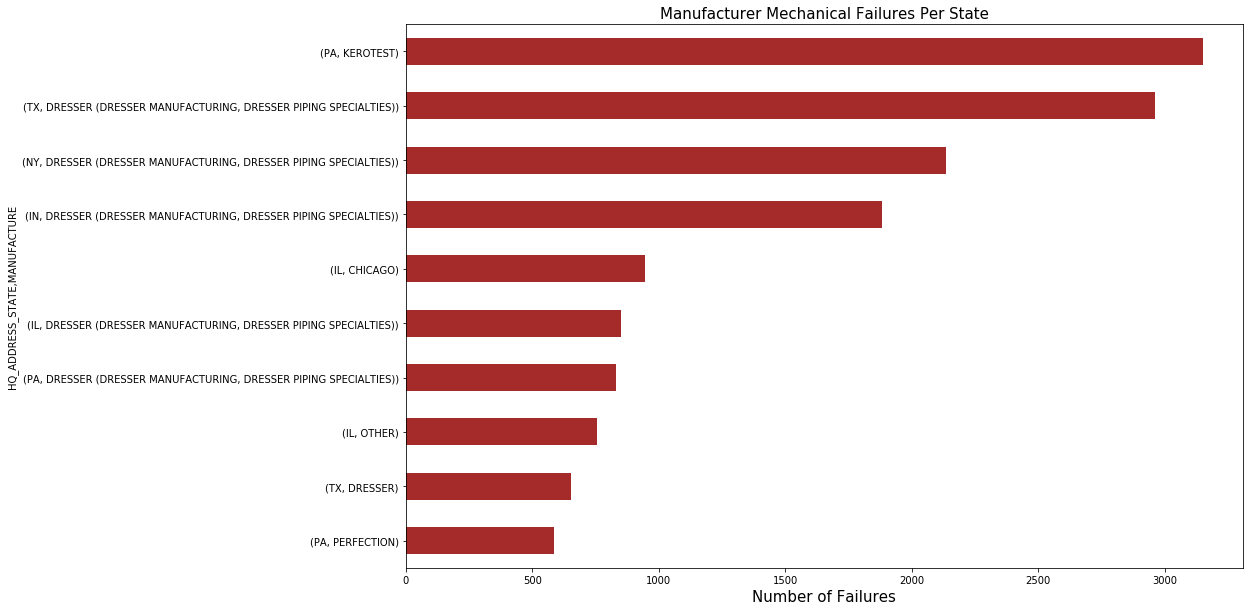

In [6544]:
#Top 10 known manufacturers by state where leak occured? 

df_mfg_known=df[(df["MANUFACTURE"]!= "UNKNOWN") & (df["MANUFACTURE"]!="UNAVAILABLE")].groupby(['HQ_ADDRESS_STATE', 'MANUFACTURE'])['MANUFACTURE'].count().sort_values(ascending=False)
df_mfg_known.head(10).sort_values(ascending = True).plot(kind = 'barh',figsize = (15,10), color = 'brown')
_ = plt.xlabel('Number of Failures', fontsize = 15)
_ = plt.title("Manufacturer Mechanical Failures Per State", fontsize = 15)
print(df_mfg_known.head())

#### Observation: 
1. State PA and Manufacture Kerotest had maximum number of mechanical failures.

In [6545]:
#Manufacturer Summary per State:
df_mfg_summary=df_mfg_known.agg({'TOTAL MFG KNOW': 'sum', 'MAXIMUM MFG PER STATE': 'max', 'MINIMUM MFG PER STATE': 'min', 'AVERAGE MFG PER STATE': 'mean'})
df_mfg_summary.round(2)

TOTAL MFG KNOW           37849.00
MAXIMUM MFG PER STATE     3152.00
MINIMUM MFG PER STATE        1.00
AVERAGE MFG PER STATE       44.53
Name: MANUFACTURE, dtype: float64

#### Question: What is the relationship between various dates provided in the dataset?  

In [6546]:
#Let's calculate time delta between various dates: 
print(df[['DATAFILE_AS_OF','REPORT_YEAR' , 'REPORT_DATE', 'FILING_DATE', 'FAILURE_DATE']].head())

  DATAFILE_AS_OF                   REPORT_YEAR REPORT_DATE FILING_DATE  \
0     2018-04-03 1970-01-01 00:00:00.000002018  2018-03-06  2018-03-06   
1     2018-04-03 1970-01-01 00:00:00.000002018  2018-03-06  2018-03-06   
2     2018-04-03 1970-01-01 00:00:00.000002018  2018-03-06  2018-03-06   
3     2018-04-03 1970-01-01 00:00:00.000002018  2018-03-06  2018-03-06   
4     2018-04-03 1970-01-01 00:00:00.000002018  2018-03-06  2018-03-06   

  FAILURE_DATE  
0   2018-02-27  
1   2018-02-19  
2   2018-02-16  
3   2018-02-15  
4   2018-02-15  


In [6547]:
#Convert Report Year to show only Date:
#df['REPORT_YEAR'] = df['REPORT_YEAR'].datetime.year

In [6548]:
#Verify all 4 date columns have same format:
print(df[['DATAFILE_AS_OF','REPORT_YEAR' , 'REPORT_DATE', 'FILING_DATE', 'FAILURE_DATE']].head())

  DATAFILE_AS_OF                   REPORT_YEAR REPORT_DATE FILING_DATE  \
0     2018-04-03 1970-01-01 00:00:00.000002018  2018-03-06  2018-03-06   
1     2018-04-03 1970-01-01 00:00:00.000002018  2018-03-06  2018-03-06   
2     2018-04-03 1970-01-01 00:00:00.000002018  2018-03-06  2018-03-06   
3     2018-04-03 1970-01-01 00:00:00.000002018  2018-03-06  2018-03-06   
4     2018-04-03 1970-01-01 00:00:00.000002018  2018-03-06  2018-03-06   

  FAILURE_DATE  
0   2018-02-27  
1   2018-02-19  
2   2018-02-16  
3   2018-02-15  
4   2018-02-15  


In [6551]:
#Let's calculate time delta between various dates:

#Is there a difference between report and filing date?

delta_filing_report_years = df['FILING_DATE'] - df['REPORT_DATE']

delta_filing_report_years = delta_filing_report_years.dt.days

print(f"Years of delay when report was filed Vs reported:\n {round((delta_filing_report_years/365),2).sort_values(ascending = False).head()}")

Years of delay when report was filed Vs reported:
 84314    6.04
84319    6.00
83530    5.91
69657    5.28
76279    4.87
dtype: float64


#### Question: How many damages were filed and reported the same day?

Percentage Filed and Reported same day:
 0    88.422049
dtype: float64


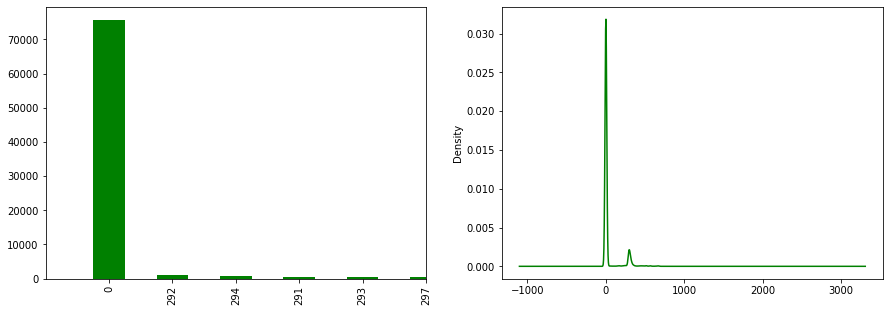

In [6552]:
#Filed Vs reported same day? 
print("Percentage Filed and Reported same day:"'\n',(delta_filing_report.value_counts()/df.shape[0]*100).sort_values(ascending = False).head(1))
plt.subplot(1,2,1)
delta_filing_report.value_counts().plot.bar(color = 'green', figsize = (15,5))
plt.xlim(-1,5)

plt.subplot(1,2,2)
delta_filing_report.plot.kde(color = 'green')

#### Question: Is there a difference between reported and failure date?

In [6553]:
#Difference between reported and failure date?

delta_report_failure_years = df['REPORT_DATE'] - df['FAILURE_DATE']

delta_report_failure_years = delta_report_failure_years.dt.days

print(f"Years of delay when failure occured Vs reported:\n {round((delta_report_failure_years/365),2).sort_values(ascending = False).head()}")

Years of delay when failure occured Vs reported:
 82056    6.04
82057    5.82
73668    5.79
73676    5.75
73677    5.75
dtype: float64


#### Question: How many damages were reported the same day when failure occured?

Percentage Failed Vs Reported same day:
 385    0.575861
405    0.573524
406    0.571188
3      0.570020
2      0.563012
dtype: float64
Which days saw failed and reported damages more frequently: 0    385
dtype: int64


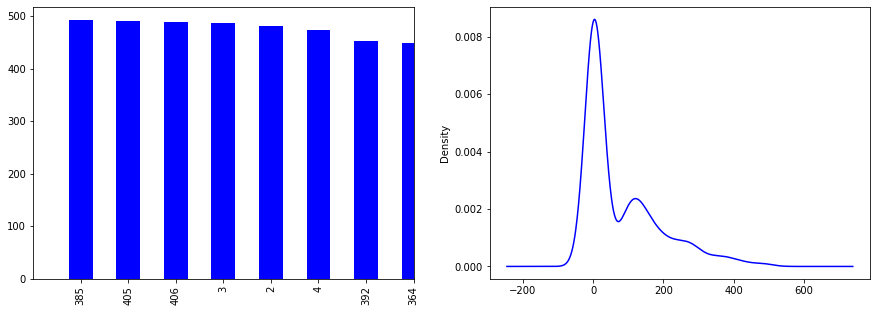

In [6554]:
#Reported Vs failure date:
print("Percentage Failed Vs Reported same day:"'\n',(delta_report_failure.value_counts()/df.shape[0]*100).sort_values(ascending = False).head())
plt.subplot(1,2,1)
delta_report_failure.value_counts().plot.bar(color = 'blue', figsize = (15,5))
plt.xlim(-1,7)

plt.subplot(1,2,2)
delta_report_failure.value_counts().plot.kde(color = 'blue')

#Calculate mode:
print("Which days saw failed and reported damages more frequently:",delta_report_failure.mode())

#### Observation: 
1. From above plots, we can see that majority of mechanical failures were reported and filed the same day.
2. There is no data available that might sugest that reporting delay led to safety concerns.
3. 385 observations were reported on the same day as the failure date.

In [6555]:
#This means inorder to remove filing error, filing date and report date should be same as the failure date. 
df['FILING_DATE_CORRECTED'] = df['FAILURE_DATE']
DELTA_FILING_CORRECTED=df['FILING_DATE_CORRECTED'] - df['FAILURE_DATE']
DELTA_FILING_CORRECTED=DELTA_FILING_CORRECTED.dt.days
DELTA_FILING_CORRECTED.sum() #time delta between filing and report date is now zero

0

#### Question: How many years elasped between filing_date_corrected and datafile_as_of date?

In [6556]:
# Elasped time between filing_date_corrected and datafile_as_of date:
DELTA_ASOF_FILING_YEARS=(df['DATAFILE_AS_OF']-df['FILING_DATE_CORRECTED']).dt.days/365
df['DELTA_ASOF_FILING_YEARS']=DELTA_ASOF_FILING_YEARS.sort_values(ascending= False)
df.head()

,DATAFILE_AS_OF,FORM_REV,OPERATOR_ID,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,REPORT_DATE,FILING_DATE,OPERATOR_NAME,...,SECOND_PIPE_PLASTIC_OTHER,LEAK_CAUSE_TEXT,LEAK_CAUSE_OTHER,NF_THERMAL_EXP_TEXT,EX_DAMAGE_OCCURRED_TEXT,MAT_WELDS_LEAK_CAUSE_TEXT,LEAK_OCCURRED_TEXT,MFF_NUMBER_FROM_OPERATOR,FILING_DATE_CORRECTED,DELTA_ASOF_FILING_YEARS
0,2018-04-03,7100.1-2 10-2014,1209,1970-01-01 00:00:00.000002018,20180227120985471,85414,INITIAL,2018-03-06,2018-03-06,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL,00028186,2018-02-27,0.095890
1,2018-04-03,7100.1-2 10-2014,1209,1970-01-01 00:00:00.000002018,20180219120985470,85413,INITIAL,2018-03-06,2018-03-06,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,CORROSION,NaN,NaN,NaN,NaN,LEAKED THROUGH BODY,00028008,2018-02-19,0.117808
2,2018-04-03,7100.1-2 10-2014,1209,1970-01-01 00:00:00.000002018,20180216120985468,85411,INITIAL,2018-03-06,2018-03-06,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL,00027950,2018-02-16,0.126027
3,2018-04-03,7100.1-2 10-2014,1209,1970-01-01 00:00:00.000002018,20180215120985467,85410,INITIAL,2018-03-06,2018-03-06,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL,00027949,2018-02-15,0.128767
4,2018-04-03,7100.1-2 10-2014,1209,1970-01-01 00:00:00.000002018,20180215120985466,85409,INITIAL,2018-03-06,2018-03-06,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,NATURAL FORCES,NaN,NO,NaN,NaN,LEAKED THROUGH SEAL,00027912,2018-02-15,0.128767


#### Question: Oldest Installation? 

In [6557]:
#Explore and Clean Installation Date:
df['YEAR_INSTALLED']=df['YEAR_INSTALLED'][(df['YEAR_INSTALLED'].notnull()) & (df['YEAR_INSTALLED']!='UNKNOWN')].str.strip()

In [6558]:
#Most Frequent Installation Year:
print(df['YEAR_INSTALLED'].mode()) 

#Fillna with mode:
df['YEAR_INSTALLED'] = df['YEAR_INSTALLED'].fillna('1964')

0    1964
dtype: object


In [6559]:
#Replace PRE-1940 text string with 1939:
df['YEAR_INSTALLED'] = df['YEAR_INSTALLED'].replace(df['YEAR_INSTALLED'][df['YEAR_INSTALLED']=='PRE-1940'],'1939')

In [6560]:
#Replace 1976-1992 text string with 1984 (Mid-Year Difference Value):
df['YEAR_INSTALLED'] = df['YEAR_INSTALLED'].replace(df['YEAR_INSTALLED'][df['YEAR_INSTALLED']=='1976-1992'], '1984')

In [6561]:
df['YEAR_INSTALLED'].head()

0    1982
1    1964
2    1975
3    1965
4    1985
Name: YEAR_INSTALLED, dtype: object

In [6562]:
#Convert installation year to date time format:
df['YEAR_INSTALLED'] = convert_todate(df, 'YEAR_INSTALLED').dt.year  #convert_todate is a function  

In [6616]:
#Identify oldest installation: 
df['DELTA_FAILURE_INSTALLED_YEARS'] = df['FILING_DATE_CORRECTED'].dt.year-df['YEAR_INSTALLED']
OLDEST_INSTALLATION = df['DELTA_FAILURE_INSTALLED_YEARS'].sort_values(ascending = False).head(1).values[0]
#LASTEST_INSTALLATION 
print("Oldest Installation:", OLDEST_INSTALLATION, 'Years old')

#Oldest Installation Year: 
print("Oldest Installation Year:",df['YEAR_INSTALLED'][df['DELTA_FAILURE_INSTALLED_YEARS'] == 165].head(1).values)
print("Count of Oldest Installations:",df['DELTA_FAILURE_INSTALLED_YEARS'][df['DELTA_FAILURE_INSTALLED_YEARS'] == 165].count(), "Installations")
print("Manufacturer:",df['MANUFACTURE'][df['DELTA_FAILURE_INSTALLED_YEARS'] == 165].head(1).values)#.count(), "Installations")

Oldest Installation: 165 Years old
Oldest Installation Year: [1851]
Count of Oldest Installations: 6 Installations
Manufacturer: ['UNKNOWN']


#### Question: How many installations failed during the first year of operations?

Failed Installations Same Year:
                           Count
FAILURE_DATE MANUFACTURE       
2013.0       PERFECTION      78
2016.0       UNKNOWN         62
2014.0       UNKNOWN         37
             PERFECTION      30
2012.0       PERFECTION      25


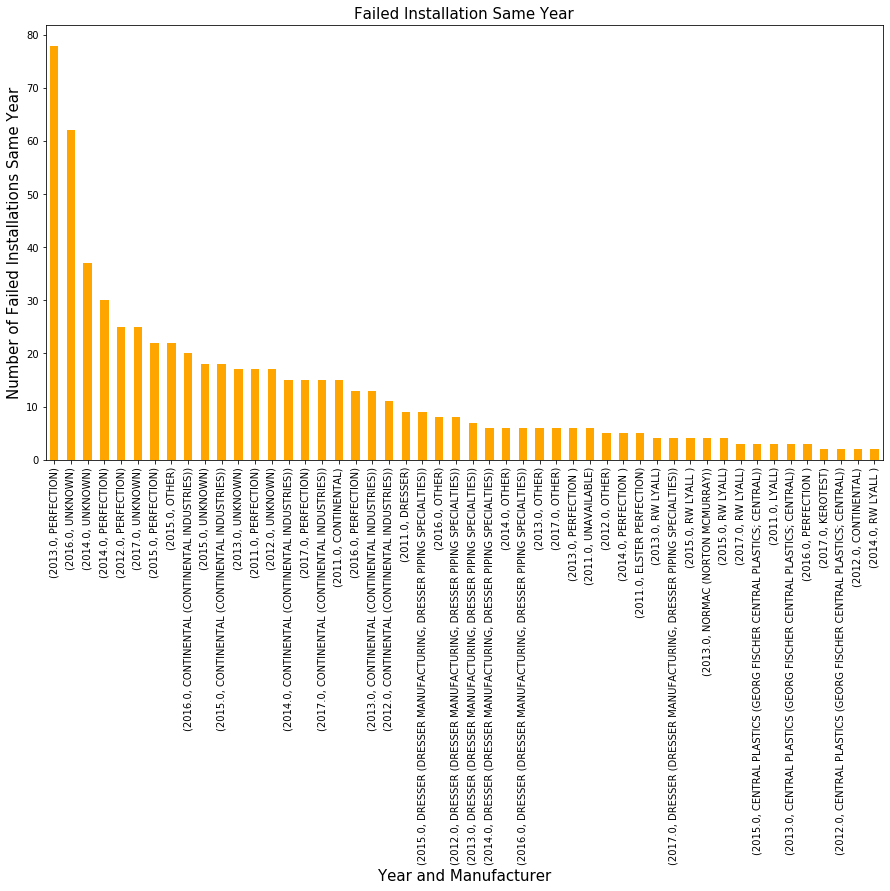

In [6744]:
#Installations Failed during 1st year: 
failed_firstyear=df.groupby((df['FAILURE_DATE'].dt.year)[df['DELTA_FAILURE_INSTALLED_YEARS'] == 0])['MANUFACTURE'].value_counts()
failed_firstyear=pd.DataFrame(failed_firstyear)
failed_firstyear.columns = ['Count']
failed_firstyear = failed_firstyear.sort_values('Count', ascending = False)
print('Failed Installations Same Year:\n', failed_firstyear.head())

failed_firstyear['Count'].head(50).plot('bar',figsize = (15,8), color = 'orange')
_ = plt.xlabel("Year and Manufacturer", fontsize = 15)
_ = plt.ylabel("Number of Failed Installations Same Year", fontsize = 15)
_ = plt.title("Failed Installation Same Year", fontsize = 15)

In [6564]:
#Check for erros in data: 
df['DELTA_FAILURE_INSTALLED_YEARS'].describe()

count    85611.000000
mean        43.009426
std         15.975901
min         -1.000000
25%         33.000000
50%         49.000000
75%         52.000000
max        165.000000
Name: DELTA_FAILURE_INSTALLED_YEARS, dtype: float64

In [6565]:
#Replace negative year with zero: 
df['DELTA_FAILURE_INSTALLED_YEARS'] = df['DELTA_FAILURE_INSTALLED_YEARS'].replace(df['DELTA_FAILURE_INSTALLED_YEARS'][df['DELTA_FAILURE_INSTALLED_YEARS']==-1], 0)

In [6566]:
#Check if error is removed: 
df['DELTA_FAILURE_INSTALLED_YEARS'].describe()

count    85611.000000
mean        43.009450
std         15.975838
min          0.000000
25%         33.000000
50%         49.000000
75%         52.000000
max        165.000000
Name: DELTA_FAILURE_INSTALLED_YEARS, dtype: float64

#### Question: Which columns can we drop from our dataset? 

In [5312]:
#Review all columns: 
df.columns

Index(['DATAFILE_AS_OF', 'FORM_REV', 'OPERATOR_ID', 'REPORT_YEAR',
       'REPORT_NUMBER', 'SUPPLEMENTAL_NUMBER', 'REPORT_TYPE', 'REPORT_DATE',
       'FILING_DATE', 'OPERATOR_NAME', 'HQ_ADDRESS_STREET', 'HQ_ADDRESS_CITY',
       'HQ_ADDRESS_COUNTY', 'HQ_ADDRESS_STATE', 'HQ_ADDRESS_ZIP',
       'FAILURE_STATE', 'FAILURE_DATE', 'MF_INVOLVED_TEXT',
       'MF_INVOLVED_OTHER', 'MF_TYPE_TEXT', 'MF_TYPE_OTHER',
       'LEAK_LOCATION_A_TEXT', 'LEAK_LOCATION_B_TEXT', 'LEAK_LOCATION_C_TEXT',
       'YEAR_INSTALLED', 'YEAR_MANUFACTURED', 'DECADE_INSTALLED',
       'MANUFACTURE', 'MANUFACTURE_MAPPED', 'MANUFACTURE_OTHER',
       'MODEL_NUMBER', 'LOT_NUMBER', 'LOT_ATTRIBUTES', 'FITTING_MATERIAL_TEXT',
       'FITTING_MATERIAL_OTHER', 'FIRST_PIPE_NOMINAL_SIZE_TEXT',
       'FIRST_PIPE_UNIT_TEXT', 'FIRST_PIPE_MATERIAL_TEXT',
       'FIRST_PIPE_MATERIAL_OTHER', 'FIRST_PIPE_PLASTIC_TEXT',
       'FIRST_PIPE_PLASTIC_OTHER', 'SECOND_PIPE_NOMINAL_SIZE_TEXT',
       'SECOND_PIPE_UNIT_TEXT', 'SECOND_PIPE_

In [5313]:
#Call Missing Value Dashboard generated earlier:
missing_dashboard(dataframe = df, 
                  missing_col= missing_columns,
                  missing_percentage = 0.7)

Average (base) Missing Percentage: 0.72 
Number of Missing Columns
(Random with Missing Percentage): 15


,missing_values,missing_percentage,unique_values_in_missing_columns,available_values_in_missing column
HQ_ADDRESS_COUNTY,79345,0.93,84,6266
MF_INVOLVED_OTHER,71434,0.83,731,14177
MF_TYPE_OTHER,82557,0.96,317,3054
DECADE_INSTALLED,77247,0.90,10,8364
MANUFACTURE_OTHER,82683,0.97,196,2928
LOT_ATTRIBUTES,75017,0.88,738,10594
FITTING_MATERIAL_OTHER,84411,0.99,52,1200
FIRST_PIPE_MATERIAL_OTHER,82845,0.97,41,2766
FIRST_PIPE_PLASTIC_OTHER,85557,1.00,24,54
SECOND_PIPE_MATERIAL_OTHER,85274,1.00,53,337


In [5481]:
12845+2108+12551

27504

#### Observation:
1. Multiple columns with 'OTHER' as keywords have already been replaced. 
2. Hence, multiple columns can be dropped from our dataset where column label name is ending with _OTHER.
3. There are 3 columns with only 2 unique values and **27,504** available values. Can we save these? 

#### Question: IS there a relationship between LEAK_CAUSE TEXT & above 3 columns?

In [5317]:
#Count of available values:
df[['LEAK_CAUSE_TEXT','NF_THERMAL_EXP_TEXT','EX_DAMAGE_OCCURRED_TEXT', 'MAT_WELDS_LEAK_CAUSE_TEXT']].count()

LEAK_CAUSE_TEXT              85611
NF_THERMAL_EXP_TEXT          12845
EX_DAMAGE_OCCURRED_TEXT       2108
MAT_WELDS_LEAK_CAUSE_TEXT    12551
dtype: int64

In [5343]:
#Relationship between LEAK_CAUSE_TEXT and NF_THERMAL_EXP_TEXT
df[['LEAK_CAUSE_TEXT','NF_THERMAL_EXP_TEXT','EX_DAMAGE_OCCURRED_TEXT', 'MAT_WELDS_LEAK_CAUSE_TEXT']][(df['NF_THERMAL_EXP_TEXT'].notnull())==True].head()

,LEAK_CAUSE_TEXT,NF_THERMAL_EXP_TEXT,EX_DAMAGE_OCCURRED_TEXT,MAT_WELDS_LEAK_CAUSE_TEXT
4,NATURAL FORCES,NO,NaN,NaN
6,NATURAL FORCES,NO,NaN,NaN
14,NATURAL FORCES,NO,NaN,NaN
39,NATURAL FORCES,NO,NaN,NaN
40,NATURAL FORCES,NO,NaN,NaN


In [5341]:
#LEAK_CAUSE_TEXT caused due to Natural Forces compared to 3 columns: 
print(df[['LEAK_CAUSE_TEXT','NF_THERMAL_EXP_TEXT','EX_DAMAGE_OCCURRED_TEXT', 'MAT_WELDS_LEAK_CAUSE_TEXT']][df_cleaned['LEAK_CAUSE_TEXT']=='NATURAL FORCES'].nunique())

LEAK_CAUSE_TEXT              1
NF_THERMAL_EXP_TEXT          2
EX_DAMAGE_OCCURRED_TEXT      0
MAT_WELDS_LEAK_CAUSE_TEXT    0
dtype: int64


#### Observation:
1. LEAK_CAUSE_TEXT: Natural Forces have two options YES or NO under NF_THERMAL_EXP_TEXT.

In [5349]:
#Relationship between LEAK_CAUSE_TEXT and EX_DAMAGE_OCCURRED_TEXT
df[['LEAK_CAUSE_TEXT','NF_THERMAL_EXP_TEXT','EX_DAMAGE_OCCURRED_TEXT', 'MAT_WELDS_LEAK_CAUSE_TEXT']][(df['EX_DAMAGE_OCCURRED_TEXT'].notnull())==True].tail()

,LEAK_CAUSE_TEXT,NF_THERMAL_EXP_TEXT,EX_DAMAGE_OCCURRED_TEXT,MAT_WELDS_LEAK_CAUSE_TEXT
85529,EXCAVATION DAMAGE,NaN,AT TIME OF LEAK DISCOVERY,NaN
85542,EXCAVATION DAMAGE,NaN,AT TIME OF LEAK DISCOVERY,NaN
85553,EXCAVATION DAMAGE,NaN,AT TIME OF LEAK DISCOVERY,NaN
85596,EXCAVATION DAMAGE,NaN,PREVIOUS TO LEAK DISCOVERY,NaN
85597,EXCAVATION DAMAGE,NaN,AT TIME OF LEAK DISCOVERY,NaN


In [5345]:
#LEAK_CAUSE_TEXT caused due to Natural Forces compared to 3 columns: 
print(df[['LEAK_CAUSE_TEXT','NF_THERMAL_EXP_TEXT','EX_DAMAGE_OCCURRED_TEXT', 'MAT_WELDS_LEAK_CAUSE_TEXT']][df_cleaned['LEAK_CAUSE_TEXT']=='EXCAVATION DAMAGE'].nunique())

LEAK_CAUSE_TEXT              1
NF_THERMAL_EXP_TEXT          0
EX_DAMAGE_OCCURRED_TEXT      2
MAT_WELDS_LEAK_CAUSE_TEXT    0
dtype: int64


#### Observation:
1. LEAK_CAUSE_TEXT: EXCAVATION DAMAGE have two options AT TIME OF LEAK DISCOVERY or PREVIOUS TO LEAK DISCOVERY under EX_DAMAGE_OCCURRED_TEXT

In [5353]:
#Relationship between LEAK_CAUSE_TEXT and MAT_WELDS_LEAK_CAUSE_TEXT
df[['LEAK_CAUSE_TEXT','NF_THERMAL_EXP_TEXT','EX_DAMAGE_OCCURRED_TEXT', 'MAT_WELDS_LEAK_CAUSE_TEXT']][(df['MAT_WELDS_LEAK_CAUSE_TEXT'].notnull())==True].head()

,LEAK_CAUSE_TEXT,NF_THERMAL_EXP_TEXT,EX_DAMAGE_OCCURRED_TEXT,MAT_WELDS_LEAK_CAUSE_TEXT
92,MATERIAL OR WELDS/FUSIONS,NaN,NaN,DESIGN DEFECT
99,MATERIAL OR WELDS/FUSIONS,NaN,NaN,MATERIAL DEFECT
100,MATERIAL OR WELDS/FUSIONS,NaN,NaN,MATERIAL DEFECT
101,MATERIAL OR WELDS/FUSIONS,NaN,NaN,MATERIAL DEFECT
114,MATERIAL OR WELDS/FUSIONS,NaN,NaN,MATERIAL DEFECT


In [5355]:
#LEAK_CAUSE_TEXT caused due to Natural Forces compared to 3 columns: 
print(df[['LEAK_CAUSE_TEXT','NF_THERMAL_EXP_TEXT','EX_DAMAGE_OCCURRED_TEXT', 'MAT_WELDS_LEAK_CAUSE_TEXT']][df_cleaned['LEAK_CAUSE_TEXT']=='MATERIAL OR WELDS/FUSIONS'].nunique())

LEAK_CAUSE_TEXT              1
NF_THERMAL_EXP_TEXT          0
EX_DAMAGE_OCCURRED_TEXT      0
MAT_WELDS_LEAK_CAUSE_TEXT    2
dtype: int64


#### Observation:
1. LEAK_CAUSE_TEXT: MATERIAL OR WELDS/FUSIONS have two options DESIGN DEFECT or MATERIAL DEFECT under MAT_WELDS_LEAK_CAUSE_TEXT
2. This means LEAK_CAUSE_TEXT have 3 more columns that can be consolidated into one where 15,943 values could be filled-in. 

#### Question: Can we build a consolidated column of 15,943 from  above 3 columns?

In [5432]:

ADDITIONAL_LEAK_FEATURES = []
LEAK_CAUSE_TEXT = []
INDEX = []

df_leak_ind = df['LEAK_CAUSE_TEXT'][(df['LEAK_CAUSE_TEXT']=='NATURAL FORCES') | (df['LEAK_CAUSE_TEXT']=='EXCAVATION DAMAGE') | (df['LEAK_CAUSE_TEXT']=='MATERIAL OR WELDS/FUSIONS')].index
df_leak_ind_1 = df['LEAK_CAUSE_TEXT'][df['LEAK_CAUSE_TEXT']=='NATURAL FORCES'].index
df_leak_ind_2 = df['LEAK_CAUSE_TEXT'][df['LEAK_CAUSE_TEXT']=='EXCAVATION DAMAGE'].index
df_leak_ind_3 = df['LEAK_CAUSE_TEXT'][df['LEAK_CAUSE_TEXT']=='MAT_WELDS_LEAK_CAUSE_TEXT'].index

for i in df_leak_ind_1:
    ADDITIONAL_LEAK_FEATURES.append(df.loc[i]['NF_THERMAL_EXP_TEXT'])
    
for j in df_leak_ind_2 :
    ADDITIONAL_LEAK_FEATURES.append(df.loc[j]['EX_DAMAGE_OCCURRED_TEXT'])

for k in df_leak_ind_3:
    ADDITIONAL_LEAK_FEATURES.append(df.loc[k]['MAT_WELDS_LEAK_CAUSE_TEXT'])   
    
for leak_text in df_leak_ind:
    LEAK_CAUSE_TEXT.append(df.loc[leak_text]['LEAK_CAUSE_TEXT'])
    
for ind in df_leak_ind:
    INDEX.append(ind)

In [5433]:
print("ADDITIONAL LEAK FEATURES:", "\n", set(ADDITIONAL_LEAK_FEATURES),"\n" "LEAK CAUSE TEXT:" "\n", set(LEAK_CAUSE_TEXT))

ADDITIONAL LEAK FEATURES: 
 {nan, 'AT TIME OF LEAK DISCOVERY', 'NO', 'YES', 'PREVIOUS TO LEAK DISCOVERY'} 
LEAK CAUSE TEXT:
 {'EXCAVATION DAMAGE', 'MATERIAL OR WELDS/FUSIONS', 'NATURAL FORCES'}


In [5439]:
#Convert above list to dataframe: 
ADDITIONAL_LEAK_FEATURES = pd.DataFrame(ADDITIONAL_LEAK_FEATURES)
LEAK_CAUSE_TEXT = pd.DataFrame(LEAK_CAUSE_TEXT)
df_leak_features = pd.concat([LEAK_CAUSE_TEXT, ADDITIONAL_LEAK_FEATURES], axis = 1)
df_leak_features.columns = ['LEAK_CAUSE_TEXT', 'ADDITIONAL_LEAK_FEATURES']
df_leak_features.count()

LEAK_CAUSE_TEXT             27904
ADDITIONAL_LEAK_FEATURES    14953
dtype: int64

In [5435]:
15943-14953

990

#### Observation: 
1. There is a diffeerence of 990 values not captured in ADDITIONAL_LEAK_FEATURES using this approach.

#### Alternative Approach for building a consolidated leak features column:

In [5443]:
#Consolidated column:
#df_leak_ind contains index values of LEAK_CAUSE_TEXT that we are looking to assign leak features
df['ADDITIONAL_LEAK_FEATURES'] = df.loc[df_leak_ind]['LEAK_CAUSE_TEXT']
print('ADDITIONAL_LEAK_FEATURES:''\n', df['ADDITIONAL_LEAK_FEATURES'].unique()) 
print('Count:', df['ADDITIONAL_LEAK_FEATURES'].count())

ADDITIONAL_LEAK_FEATURES:
 [nan 'NATURAL FORCES' 'MATERIAL OR WELDS/FUSIONS' 'EXCAVATION DAMAGE']
Count: 27904


In [5447]:
#View ADDITIONAL_LEAK_FEATURES: 
df.head()  #Leak Cause Text for 
           #'NATURAL FORCES' 'MATERIAL OR WELDS/FUSIONS' 'EXCAVATION DAMAGE'
           # Correctly consolidated in to one column.

,DATAFILE_AS_OF,FORM_REV,OPERATOR_ID,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,REPORT_DATE,FILING_DATE,OPERATOR_NAME,...,LEAK_CAUSE_OTHER,NF_THERMAL_EXP_TEXT,EX_DAMAGE_OCCURRED_TEXT,MAT_WELDS_LEAK_CAUSE_TEXT,LEAK_OCCURRED_TEXT,MFF_NUMBER_FROM_OPERATOR,FILING_DATE_CORRECTED,DELTA_ASOF_FILING_YEARS,DELTA_FAILURE_INSTALLED_YEARS,ADDITIONAL_LEAK_FEATURES
0,2018-04-03,7100.1-2 10-2014,1209,1970-01-01 00:00:00.000002018,20180227120985471,85414,INITIAL,2018-03-06,2018-03-06,COLUMBIA GAS OF MASSACHUSETTS,...,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL,00028186,2018-02-27,0.095890,36,NaN
1,2018-04-03,7100.1-2 10-2014,1209,1970-01-01 00:00:00.000002018,20180219120985470,85413,INITIAL,2018-03-06,2018-03-06,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,NaN,NaN,NaN,LEAKED THROUGH BODY,00028008,2018-02-19,0.117808,54,NaN
2,2018-04-03,7100.1-2 10-2014,1209,1970-01-01 00:00:00.000002018,20180216120985468,85411,INITIAL,2018-03-06,2018-03-06,COLUMBIA GAS OF MASSACHUSETTS,...,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL,00027950,2018-02-16,0.126027,43,NaN
3,2018-04-03,7100.1-2 10-2014,1209,1970-01-01 00:00:00.000002018,20180215120985467,85410,INITIAL,2018-03-06,2018-03-06,COLUMBIA GAS OF MASSACHUSETTS,...,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL,00027949,2018-02-15,0.128767,53,NaN
4,2018-04-03,7100.1-2 10-2014,1209,1970-01-01 00:00:00.000002018,20180215120985466,85409,INITIAL,2018-03-06,2018-03-06,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,NO,NaN,NaN,LEAKED THROUGH SEAL,00027912,2018-02-15,0.128767,33,NATURAL FORCES


In [5480]:
#Assign Leak Cause Text in ADDITIONAL_LEAK_FEATURES
# consolidated unique values {nan, 'AT TIME OF LEAK DISCOVERY', 'NO', 'YES', 'PREVIOUS TO LEAK DISCOVERY'}
#This will help simply categorical feature conversion in to binary form. 

df[df['ADDITIONAL_LEAK_FEATURES']=='NATURAL FORCES'] = (df[df['ADDITIONAL_LEAK_FEATURES']=='NATURAL FORCES']).assign(ADDITIONAL_LEAK_FEATURES = df['NF_THERMAL_EXP_TEXT'])
df[df['ADDITIONAL_LEAK_FEATURES']=='EXCAVATION DAMAGE'] = (df[df['ADDITIONAL_LEAK_FEATURES']=='EXCAVATION DAMAGE']).assign(ADDITIONAL_LEAK_FEATURES = df['EX_DAMAGE_OCCURRED_TEXT'])
df[df['ADDITIONAL_LEAK_FEATURES']=='MATERIAL OR WELDS/FUSIONS'] = (df[df['ADDITIONAL_LEAK_FEATURES']=='MATERIAL OR WELDS/FUSIONS']).assign(ADDITIONAL_LEAK_FEATURES = df['MAT_WELDS_LEAK_CAUSE_TEXT'])

print("Assigned Values in ADDITIONAL_LEAK_FEATURES:""\n", df['ADDITIONAL_LEAK_FEATURES'].unique(),'\n')
print("Count of Assigned Values in ADDITIONAL_LEAK_FEATURES:""\n", df['ADDITIONAL_LEAK_FEATURES'].value_counts(),'\n')
print("Total Count of Assigned Values in ADDITIONAL_LEAK_FEATURES:", df['ADDITIONAL_LEAK_FEATURES'].value_counts().sum())

Assigned Values in ADDITIONAL_LEAK_FEATURES:
 [nan 'NO' 'YES' 'DESIGN DEFECT' 'MATERIAL DEFECT'
 'AT TIME OF LEAK DISCOVERY' 'PREVIOUS TO LEAK DISCOVERY'] 

Count of Assigned Values in ADDITIONAL_LEAK_FEATURES:
 MATERIAL DEFECT               7734
YES                           6424
NO                            6421
DESIGN DEFECT                 4817
AT TIME OF LEAK DISCOVERY     1872
PREVIOUS TO LEAK DISCOVERY     236
Name: ADDITIONAL_LEAK_FEATURES, dtype: int64 

Total Count of Assigned Values in ADDITIONAL_LEAK_FEATURES: 27504


#### Observation: 
1. New column ADDITIONAL_LEAK_FEATURES successfully created. 
2. Hence, based on above which columns can we drop? 

#### Selecting columns to drop from our dataset
1. After missing value replacement
2. After data cleaning

In [5483]:
#Unique values already extracted and replaced 'OTHER' in multiple columns 
columns_to_drop = ['HQ_ADDRESS_COUNTY', 
                    'HQ_ADDRESS_STREET',
                    'MF_INVOLVED_OTHER',
                    'MF_TYPE_OTHER',
                    'MANUFACTURE_OTHER',
                    'FITTING_MATERIAL_OTHER',
                    'FIRST_PIPE_MATERIAL_OTHER',
                    'FIRST_PIPE_PLASTIC_OTHER',
                    'SECOND_PIPE_MATERIAL_OTHER',
                    'SECOND_PIPE_PLASTIC_OTHER',
                    'LEAK_CAUSE_OTHER',
                    'REPORT_YEAR',
                    'REPORT_DATE', 
                    'FILING_DATE',
                    'FAILURE_DATE',
                    'YEAR_MANUFACTURED',
                    'DECADE_INSTALLED',
                    'NF_THERMAL_EXP_TEXT',
                    'EX_DAMAGE_OCCURRED_TEXT',
                    'MAT_WELDS_LEAK_CAUSE_TEXT']
                

In [5486]:
df_cleaned = df.drop(columns = columns_to_drop, axis= 1)
df_cleaned#.head()

,DATAFILE_AS_OF,FORM_REV,OPERATOR_ID,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_NAME,HQ_ADDRESS_CITY,HQ_ADDRESS_STATE,HQ_ADDRESS_ZIP,...,SECOND_PIPE_UNIT_TEXT,SECOND_PIPE_MATERIAL_TEXT,SECOND_PIPE_PLASTIC_TEXT,LEAK_CAUSE_TEXT,LEAK_OCCURRED_TEXT,MFF_NUMBER_FROM_OPERATOR,FILING_DATE_CORRECTED,DELTA_ASOF_FILING_YEARS,DELTA_FAILURE_INSTALLED_YEARS,ADDITIONAL_LEAK_FEATURES
0,2018-04-03,7100.1-2 10-2014,1209.0,2.018023e+16,85414.0,INITIAL,COLUMBIA GAS OF MASSACHUSETTS,WESTBOROUGH,MA,01581,...,IPS,STEEL,NaN,OTHER,LEAKED THROUGH SEAL,00028186,2018-02-27,0.095890,36.0,NaN
1,2018-04-03,7100.1-2 10-2014,1209.0,2.018022e+16,85413.0,INITIAL,COLUMBIA GAS OF MASSACHUSETTS,WESTBOROUGH,MA,01581,...,CTS,PLASTIC,POLYETHYLENE (PE),CORROSION,LEAKED THROUGH BODY,00028008,2018-02-19,0.117808,54.0,NaN
2,2018-04-03,7100.1-2 10-2014,1209.0,2.018022e+16,85411.0,INITIAL,COLUMBIA GAS OF MASSACHUSETTS,WESTBOROUGH,MA,01581,...,IPS,STEEL,NaN,OTHER,LEAKED THROUGH SEAL,00027950,2018-02-16,0.126027,43.0,NaN
3,2018-04-03,7100.1-2 10-2014,1209.0,2.018022e+16,85410.0,INITIAL,COLUMBIA GAS OF MASSACHUSETTS,WESTBOROUGH,MA,01581,...,IPS,STEEL,NaN,OTHER,LEAKED THROUGH SEAL,00027949,2018-02-15,0.128767,53.0,NaN
4,2018-04-03,7100.1-2 10-2014,1209.0,2.018022e+16,85409.0,INITIAL,COLUMBIA GAS OF MASSACHUSETTS,WESTBOROUGH,MA,01581,...,IPS,STEEL,NaN,NATURAL FORCES,LEAKED THROUGH SEAL,00027912,2018-02-15,0.128767,33.0,NO
5,2018-04-03,7100.1-2 10-2014,1209.0,2.018021e+16,85408.0,INITIAL,COLUMBIA GAS OF MASSACHUSETTS,WESTBOROUGH,MA,01581,...,IPS,STEEL,NaN,OTHER,LEAKED THROUGH SEAL,00027877,2018-02-14,0.131507,52.0,NaN
6,2018-04-03,7100.1-2 10-2014,1209.0,2.018021e+16,85412.0,INITIAL,COLUMBIA GAS OF MASSACHUSETTS,WESTBOROUGH,MA,01581,...,IPS,STEEL,NaN,NATURAL FORCES,LEAKED THROUGH SEAL,00027954,2018-02-13,0.134247,45.0,NO
7,2018-04-03,7100.1-2 10-2014,1209.0,2.018021e+16,85407.0,INITIAL,COLUMBIA GAS OF MASSACHUSETTS,WESTBOROUGH,MA,01581,...,IPS,STEEL,NaN,OTHER,LEAKED THROUGH SEAL,00027871,2018-02-13,0.134247,56.0,NaN
8,2018-04-03,7100.1-2 10-2014,1209.0,2.018021e+16,85406.0,INITIAL,COLUMBIA GAS OF MASSACHUSETTS,WESTBOROUGH,MA,01581,...,IPS,STEEL,NaN,OTHER,LEAKED THROUGH SEAL,00027773,2018-02-09,0.145205,35.0,NaN
9,2018-04-03,7100.1-2 10-2014,1209.0,2.018021e+16,85405.0,INITIAL,COLUMBIA GAS OF MASSACHUSETTS,WESTBOROUGH,MA,01581,...,IPS,STEEL,NaN,OTHER,LEAKED THROUGH SEAL,00027765,2018-02-09,0.145205,35.0,NaN


In [5485]:
df_cleaned.shape

(85611, 38)

In [5487]:
df_cleaned.columns

Index(['DATAFILE_AS_OF', 'FORM_REV', 'OPERATOR_ID', 'REPORT_NUMBER',
       'SUPPLEMENTAL_NUMBER', 'REPORT_TYPE', 'OPERATOR_NAME',
       'HQ_ADDRESS_CITY', 'HQ_ADDRESS_STATE', 'HQ_ADDRESS_ZIP',
       'FAILURE_STATE', 'MF_INVOLVED_TEXT', 'MF_TYPE_TEXT',
       'LEAK_LOCATION_A_TEXT', 'LEAK_LOCATION_B_TEXT', 'LEAK_LOCATION_C_TEXT',
       'YEAR_INSTALLED', 'MANUFACTURE', 'MANUFACTURE_MAPPED', 'MODEL_NUMBER',
       'LOT_NUMBER', 'LOT_ATTRIBUTES', 'FITTING_MATERIAL_TEXT',
       'FIRST_PIPE_NOMINAL_SIZE_TEXT', 'FIRST_PIPE_UNIT_TEXT',
       'FIRST_PIPE_MATERIAL_TEXT', 'FIRST_PIPE_PLASTIC_TEXT',
       'SECOND_PIPE_NOMINAL_SIZE_TEXT', 'SECOND_PIPE_UNIT_TEXT',
       'SECOND_PIPE_MATERIAL_TEXT', 'SECOND_PIPE_PLASTIC_TEXT',
       'LEAK_CAUSE_TEXT', 'LEAK_OCCURRED_TEXT', 'MFF_NUMBER_FROM_OPERATOR',
       'FILING_DATE_CORRECTED', 'DELTA_ASOF_FILING_YEARS',
       'DELTA_FAILURE_INSTALLED_YEARS', 'ADDITIONAL_LEAK_FEATURES'],
      dtype='object')

#### Data Visualization:

****Top 15 reasons for leak****
                             Reason_Count  % Reason_Count
EQUIPMENT                          39370       45.987081
NATURAL FORCES                     13230       15.453622
MATERIAL OR WELDS/FUSIONS          12551       14.660499
INCORRECT OPERATION                 7070        8.258285
OTHER                               4464        5.214283
CORROSION                           4330        5.057761
EXCAVATION DAMAGE                   2123        2.479822
OTHER OUTSIDE FORCE DAMAGE           575        0.671643
THREAD LEAK                          225        0.262817
GASKET O-RING                        223        0.260481
NUTS LOOSENED                        180        0.210253
SEAL LEAK                            163        0.190396
GASKET                               144        0.168203
NUT FOLLOWER                         133        0.155354
AGE                                   90        0.105127


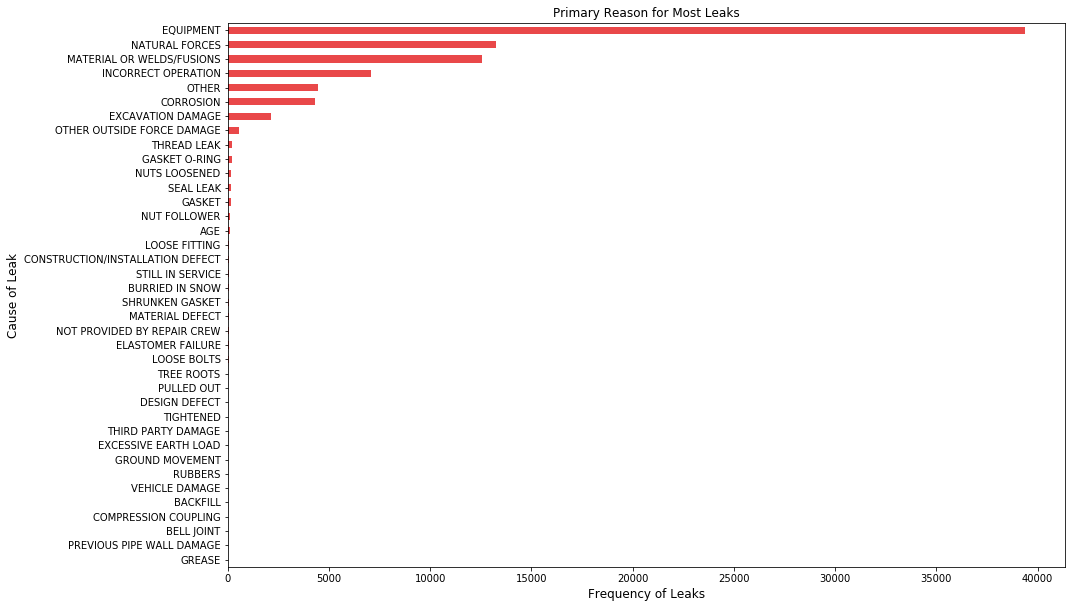

****Features which caused leak**** 
                                                       Feature_Count  \
LEAK_CAUSE_TEXT           ADDITIONAL_LEAK_FEATURES                    
MATERIAL OR WELDS/FUSIONS MATERIAL DEFECT                      7734   
NATURAL FORCES            YES                                  6424   
                          NO                                   6421   
MATERIAL OR WELDS/FUSIONS DESIGN DEFECT                        4817   
EXCAVATION DAMAGE         AT TIME OF LEAK DISCOVERY            1872   
                          PREVIOUS TO LEAK DISCOVERY            236   

                                                      %_Feature_Count  
LEAK_CAUSE_TEXT           ADDITIONAL_LEAK_FEATURES                     
MATERIAL OR WELDS/FUSIONS MATERIAL DEFECT                    9.033886  
NATURAL FORCES            YES                                7.503709  
                          NO                                 7.500204  
MATERIAL OR WELDS/FUSIONS DESIGN D

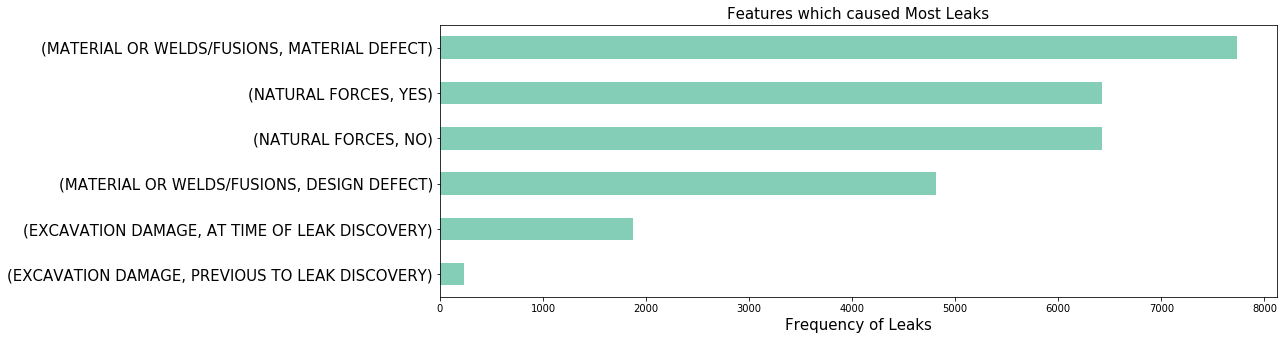

****Portion where leak occured**** 
                      Occurred_Count  % Occurred_Count
LEAKED THROUGH SEAL           72062         84.173763
LEAKED THROUGH BODY            7867          9.189240
PULLED OUT                     5682          6.636998


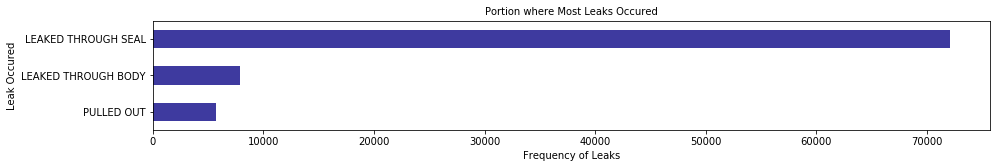

In [6231]:
#Reason for Most Leaks:
reason_leak=df_cleaned['LEAK_CAUSE_TEXT'].value_counts().sort_values(ascending = False).head(15)
percent_leak= (df_cleaned['LEAK_CAUSE_TEXT'].value_counts()/df_cleaned.shape[0]*100).head(15)
df_reason_summary=pd.concat([reason_leak, percent_leak], axis = 1)
df_reason_summary.columns = ['Reason_Count', '% Reason_Count'] 
print('****Top 15 reasons for leak****\n', df_reason_summary)
df_cleaned['LEAK_CAUSE_TEXT'].value_counts().sort_values(ascending = True).plot('barh', cmap="Set1", figsize= (15,10), alpha =0.8)
_ = plt.yticks(fontsize = 10)
_ = plt.xlabel('Frequency of Leaks', fontsize = 12)
_ = plt.ylabel('Cause of Leak', fontsize = 12)
_ = plt.title("Primary Reason for Most Leaks", fontsize = 12)
_ = plt.show()



#Features which caused Most Leak:
feature_count = df_cleaned.groupby(['LEAK_CAUSE_TEXT'])['ADDITIONAL_LEAK_FEATURES'].value_counts()
percent_features =  df_cleaned.groupby(['LEAK_CAUSE_TEXT'])['ADDITIONAL_LEAK_FEATURES'].value_counts()/df_cleaned.shape[0]*100
df_feature_summary = pd.concat([feature_count, percent_features], axis = 1)
df_feature_summary.columns = ['Feature_Count', '%_Feature_Count']
print('****Features which caused leak**** \n',df_feature_summary.sort_values(by ='%_Feature_Count', ascending=False))
df_cleaned.groupby(['LEAK_CAUSE_TEXT'])['ADDITIONAL_LEAK_FEATURES'].value_counts().sort_values(ascending= True).plot('barh', cmap="Set2", figsize = (15,5), alpha =0.8)
_ = plt.yticks(fontsize = 15)
_ = plt.xlabel('Frequency of Leaks', fontsize = 15)
_ = plt.ylabel('', fontsize = 15)
_ = plt.title("Features which caused Most Leaks", fontsize = 15)
_ = plt.show()

#Portion Where Leak Most Occurred:
occurred_leak = df_cleaned['LEAK_OCCURRED_TEXT'].value_counts().sort_values(ascending = False)
percent_occurred = (df_cleaned['LEAK_OCCURRED_TEXT'].value_counts()/df_cleaned.shape[0]*100)
df_occurred_summary=pd.concat([occurred_leak, percent_occurred], axis = 1)
df_occurred_summary.columns = ['Occurred_Count', '% Occurred_Count'] 
print('****Portion where leak occured**** \n', df_occurred_summary)
#print('****Portion where leak occured**** \n', df_cleaned['LEAK_OCCURRED_TEXT'].value_counts().sort_values(ascending = False))
df_cleaned['LEAK_OCCURRED_TEXT'].value_counts().sort_values(ascending = True).plot('barh', figsize = (15,2), cmap = 'plasma', alpha =0.8)
_ = plt.yticks(fontsize = 10)
_ = plt.xlabel('Frequency of Leaks', fontsize = 10)
_ = plt.ylabel('Leak Occured', fontsize = 10)
_ = plt.title("Portion where Most Leaks Occured", fontsize = 10)
_ = plt.show()


#### Observation:
Maximum Impact:
1. 39.4k or 46% leaks were caused due to equipment failure, where features of failure are not known.
2. 7.7k or 9% leak were casued due to welding defects
3. 72.1k or 84% leaked through the seal.

Manufacturer Supplied Defect Frequency:
                                                                               Count
MANUFACTURE                                        LEAK_CAUSE_TEXT                 
DRESSER (DRESSER MANUFACTURING, DRESSER PIPING ... EQUIPMENT                   7985
                                                   NATURAL FORCES              2461
KEROTEST                                           EQUIPMENT                   2177
                                                   MATERIAL OR WELDS/FUSIONS   2162
PERFECTION                                         INCORRECT OPERATION         1285 



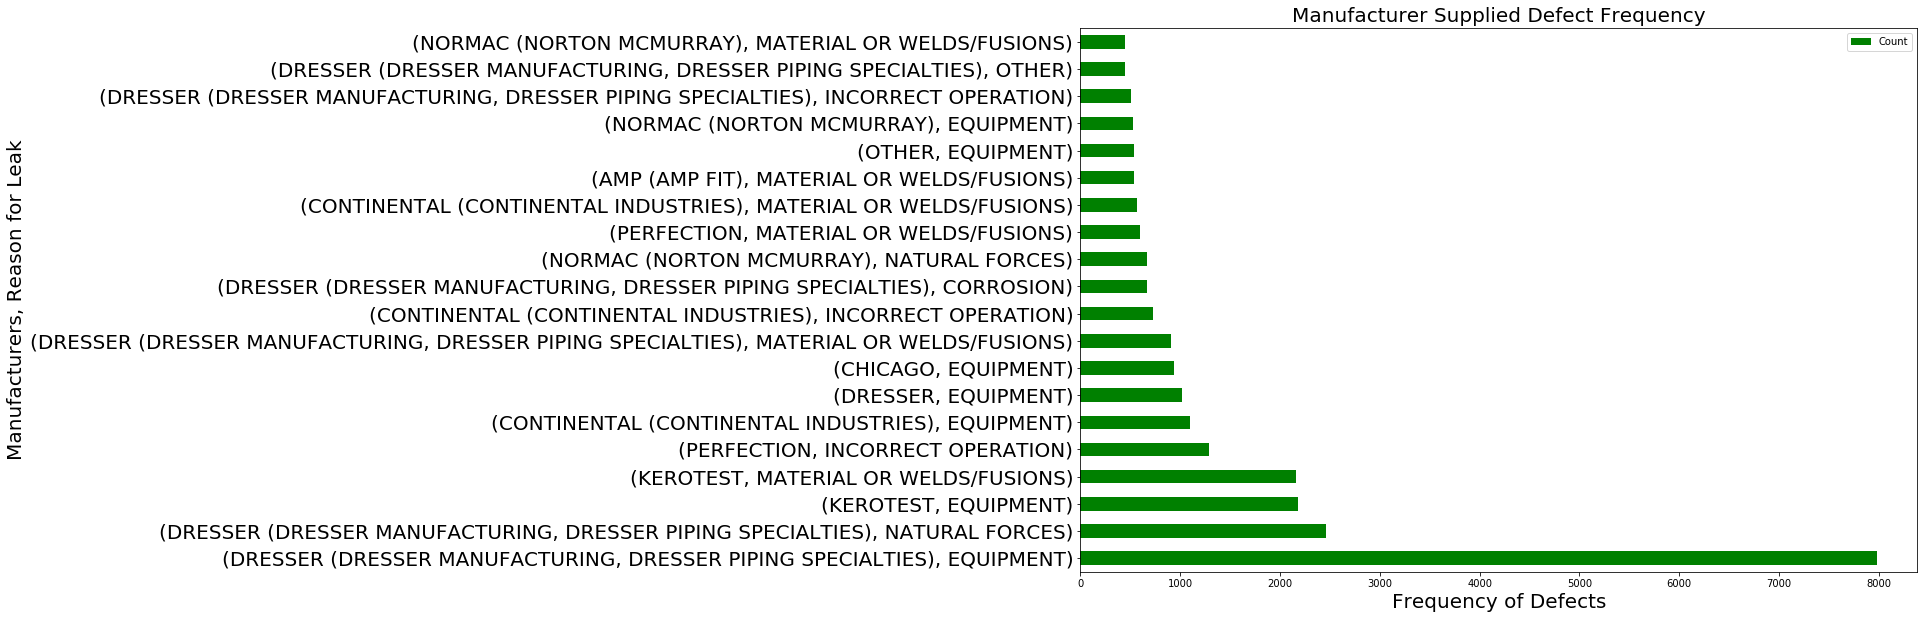

In [6369]:
#### Manufacturer Supplied Defect Frequency: 
mfg_leak=df_cleaned.groupby(['MANUFACTURE', 'LEAK_CAUSE_TEXT'])['LEAK_CAUSE_TEXT'].count()
mfg_leak = pd.DataFrame(mfg_leak)
mfg_leak.columns = ['Count']
mfg_leak = mfg_leak.reset_index()
mfg_leak_known = mfg_leak[mfg_leak['MANUFACTURE'] != 'UNKNOWN']
print('Manufacturer Supplied Defect Frequency:\n', mfg_leak_known.set_index(['MANUFACTURE', 'LEAK_CAUSE_TEXT']).sort_values('Count', ascending = False).head(5),'\n')
mfg_leak_known.set_index(['MANUFACTURE', 'LEAK_CAUSE_TEXT']).sort_values('Count', ascending = False).head(20).plot.barh(figsize = (15,10), color = 'green')
_ = plt.yticks(fontsize = 20)
_ = plt.xlabel('Frequency of Defects', fontsize = 20)
_ = plt.ylabel('Manufacturers, Reason for Leak', fontsize= 20)
_ = plt.title('Manufacturer Supplied Defect Frequency', fontsize = 20)

Unknown Manufacturer Supplied Defect Frequency:
                                        Count
MANUFACTURE LEAK_CAUSE_TEXT                 
UNKNOWN     EQUIPMENT                  23328
            NATURAL FORCES              8408
            MATERIAL OR WELDS/FUSIONS   6108
            INCORRECT OPERATION         2537
            OTHER                       2434


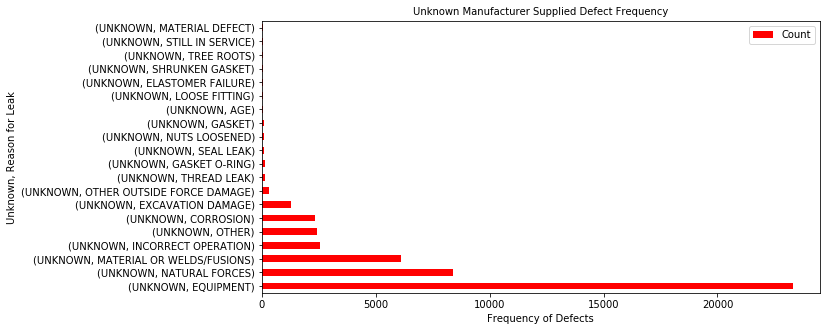

In [6371]:
#### Unknown Manufacturer Supplied Defect Frequency:
mfg_leak_unknown = mfg_leak[mfg_leak['MANUFACTURE'] == 'UNKNOWN']
mfg_leak_unknown.set_index(['MANUFACTURE', 'LEAK_CAUSE_TEXT']).sort_values('Count', ascending = False).head(20).plot.barh(figsize = (10,5), color = 'red')
print('Unknown Manufacturer Supplied Defect Frequency:\n', mfg_leak_unknown.set_index(['MANUFACTURE', 'LEAK_CAUSE_TEXT']).sort_values('Count', ascending = False).head(5))
_ = plt.yticks(fontsize = 10)
_ = plt.xlabel('Frequency of Defects', fontsize = 10)
_ = plt.ylabel('Unknown, Reason for Leak', fontsize= 10)
_ = plt.title('Unknown Manufacturer Supplied Defect Frequency', fontsize = 10)

Defect Frequency by Manufacturer:
                                                     Mfg_Count  % Mfg_Defect
MANUFACTURE                                                                
UNKNOWN                                                 47816     55.887234
DRESSER (DRESSER MANUFACTURING, DRESSER PIPING ...      13808     16.138760
KEROTEST                                                 5073      5.929311
PERFECTION                                               2954      3.452629
CONTINENTAL (CONTINENTAL INDUSTRIES)                     2928      3.422240


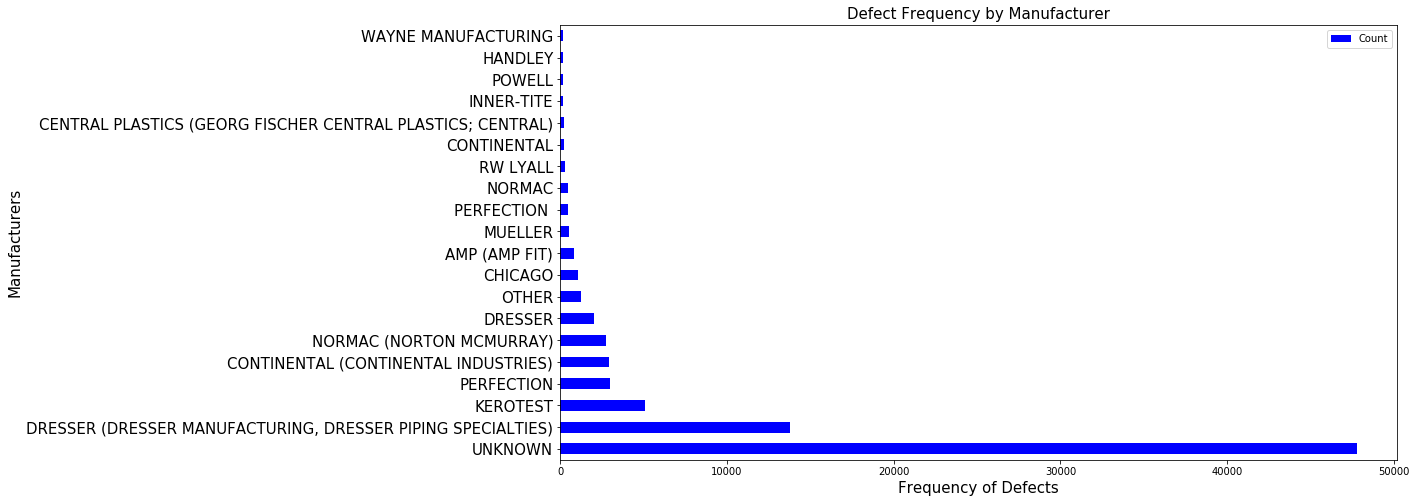

In [6469]:
#Defects By Manufacturers:
mfg  = df_cleaned.groupby('MANUFACTURE')['LEAK_CAUSE_TEXT'].count()
mfg = pd.DataFrame(mfg)
mfg.columns = ['Count']
mfg_percent = (mfg['Count']/mfg['Count'].sum())*100
mfg_percent = mfg_percent.sort_values(ascending = False)
mfg_count = mfg['Count'].sort_values(ascending = False)
mfg_count_percent = pd.concat([mfg_count,mfg_percent], axis = 1)
mfg_count_percent.columns  = ['Mfg_Count', "% Mfg_Defect"]
print('Defect Frequency by Manufacturer:\n',mfg_count_percent.head())

#Bar Distribution of Defects By Manufacturers
mfg.sort_values('Count', ascending= False).head(20).plot.barh(figsize = (15,8), color = 'blue')
_ = plt.yticks(fontsize = 15)
_ = plt.xlabel('Frequency of Defects', fontsize = 15)
_ = plt.ylabel('Manufacturers', fontsize= 15)
_ = plt.title('Defect Frequency by Manufacturer', fontsize = 15)



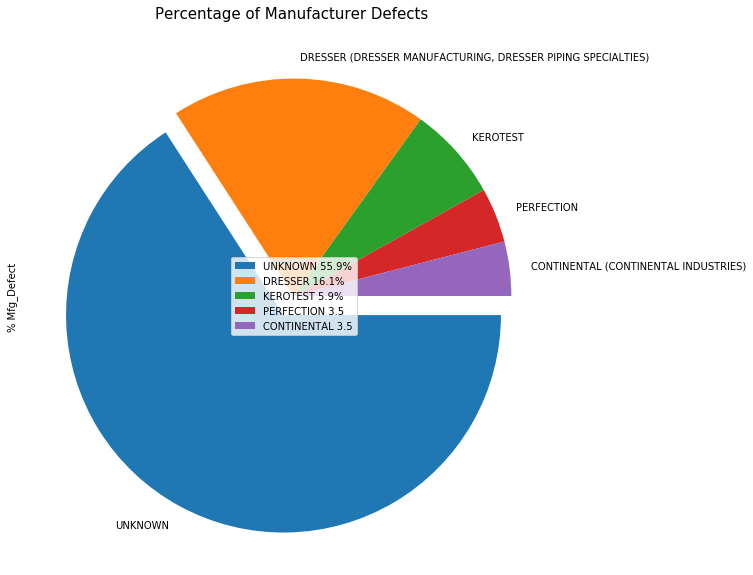

In [6507]:
#Percentage of Defects by Manufacturers: 
_ = plt.figure(figsize = (15,10))
mfg_count_percent['% Mfg_Defect'].head().plot('pie', counterclock=False, explode = [0.1,0,0,0,0])
_ = plt.legend(['UNKNOWN 55.9%', 'DRESSER 16.1%', 'KEROTEST 5.9%', 'PERFECTION 3.5', 'CONTINENTAL 3.5'], loc='center', fontsize = 10)
_ = plt.title("Percentage of Manufacturer Defects ", fontsize = 15)